##0_Collecting Data+



In [ ]:
!pip install statsmodels

In [ ]:
#Import Library for dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#Featuring
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

###Prepare Data

In [ ]:
df_store = pd.read_csv('/content/store5.csv')

In [ ]:
df_store

id        date  store_nbr                      family     sales  \
0         1452  2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453  2013-01-01          5                   BABY CARE     0.000   
2         1454  2013-01-01          5                      BEAUTY     0.000   
3         1455  2013-01-01          5                   BEVERAGES     0.000   
4         1456  2013-01-01          5                       BOOKS     0.000   
...        ...         ...        ...                         ...       ...   
55567  3000586  2017-08-15          5                     POULTRY   241.011   
55568  3000587  2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588  2017-08-15          5                     PRODUCE  1357.823   
55570  3000589  2017-08-15          5  SCHOOL AND OFFICE SUPPLIES     0.000   
55571  3000590  2017-08-15          5                     SEAFOOD     9.669   

       onpromotion  dcoilwtico  
0                0         NaN  
1                0         NaN  
2                0         NaN  
3                0         NaN  
4                0         NaN  
...            ...         ...  
55567            1       47.57  
55568            0       47.57  
55569            4       47.57  
55570            0       47.57  
55571            0       47.57  

[55572 rows x 7 columns]

In [ ]:
for column in df_store.columns:
    print('{} - Unique Values: {}'.format(column, df_store[column].unique()))

id - Unique Values: [   1452    1453    1454 ... 3000588 3000589 3000590]
date - Unique Values: ['2013-01-01' '2013-01-02' '2013-01-03' ... '2017-08-13' '2017-08-14'
 '2017-08-15']
store_nbr - Unique Values: [5]
family - Unique Values: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
sales - Unique Values: [   0.       6.       7.    ...   52.121 1357.823    9.669]
onpromotion - Unique Values: [  0   2   1   5   7  49  22  33  21   4   3   6  10 140  54  25  34  18
  13   8 131  53  12  35  20  14 135  47  37  19  16   9 133  11 144  24
  32  28  46  15  52  23  31  30  17 139  29

In [ ]:
df_store.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     17193
dtype: int64

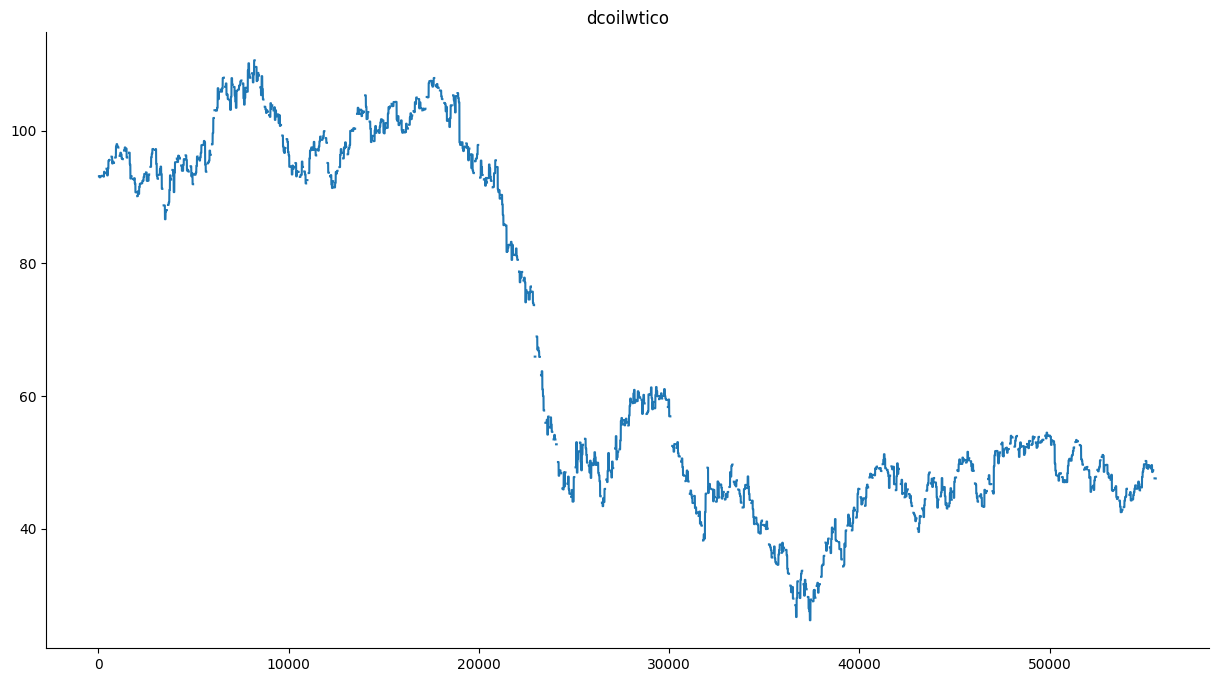

In [ ]:
# @title dcoilwtico

df_store['dcoilwtico'].plot(kind='line', figsize=(15, 8), title='dcoilwtico')
plt.gca().spines[['top', 'right']].set_visible(False)

###Cleaning Data

In [ ]:
df_store.drop(['id', 'store_nbr'], axis=1, inplace=True)

In [ ]:
df_store

date                      family     sales  onpromotion  \
0      2013-01-01                  AUTOMOTIVE     0.000            0   
1      2013-01-01                   BABY CARE     0.000            0   
2      2013-01-01                      BEAUTY     0.000            0   
3      2013-01-01                   BEVERAGES     0.000            0   
4      2013-01-01                       BOOKS     0.000            0   
...           ...                         ...       ...          ...   
55567  2017-08-15                     POULTRY   241.011            1   
55568  2017-08-15              PREPARED FOODS    52.121            0   
55569  2017-08-15                     PRODUCE  1357.823            4   
55570  2017-08-15  SCHOOL AND OFFICE SUPPLIES     0.000            0   
55571  2017-08-15                     SEAFOOD     9.669            0   

       dcoilwtico  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
55567       47.57  
55568       47.57  
55569       47.57  
55570       47.57  
55571       47.57  

[55572 rows x 5 columns]

In [ ]:
df_train = df_store.copy()

In [ ]:
df_store['date'] = pd.to_datetime(df_store['date'])
# sort by date
#df_store = df_store.set_index('date', inplace=True)
df_store = df_store.set_index('date')
df_store

family     sales  onpromotion  dcoilwtico
date                                                                     
2013-01-01                  AUTOMOTIVE     0.000            0         NaN
2013-01-01                   BABY CARE     0.000            0         NaN
2013-01-01                      BEAUTY     0.000            0         NaN
2013-01-01                   BEVERAGES     0.000            0         NaN
2013-01-01                       BOOKS     0.000            0         NaN
...                                ...       ...          ...         ...
2017-08-15                     POULTRY   241.011            1       47.57
2017-08-15              PREPARED FOODS    52.121            0       47.57
2017-08-15                     PRODUCE  1357.823            4       47.57
2017-08-15  SCHOOL AND OFFICE SUPPLIES     0.000            0       47.57
2017-08-15                     SEAFOOD     9.669            0       47.57

[55572 rows x 4 columns]

#1_Explore Data Analysis

family - Unique Values: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'eggs' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']

##This case focused on eggs and EEGS

In [ ]:
# Total penjualan per family
df_store.groupby('family')['sales'].sum().sort_values(ascending=False)

family
GROCERY I                     5.262682e+06
BEVERAGES                     2.533831e+06
CLEANING                      1.667748e+06
PRODUCE                       1.653582e+06
DAIRY                         8.712830e+05
BREAD/BAKERY                  6.428546e+05
MEATS                         4.771044e+05
PERSONAL CARE                 4.501660e+05
POULTRY                       4.196304e+05
DELI                          4.152710e+05
FROZEN FOODS                  2.696692e+05
HOME CARE                     2.392830e+05
EGGS                          1.908510e+05
PREPARED FOODS                1.479911e+05
LIQUOR,WINE,BEER              1.104140e+05
HOME AND KITCHEN II           3.723800e+04
GROCERY II                    3.324100e+04
LINGERIE                      3.156100e+04
HOME AND KITCHEN I            3.010700e+04
CELEBRATION                   2.617600e+04
SEAFOOD                       2.235899e+04
LADIESWEAR                    1.481300e+04
AUTOMOTIVE                    9.194000e+03
BEAU

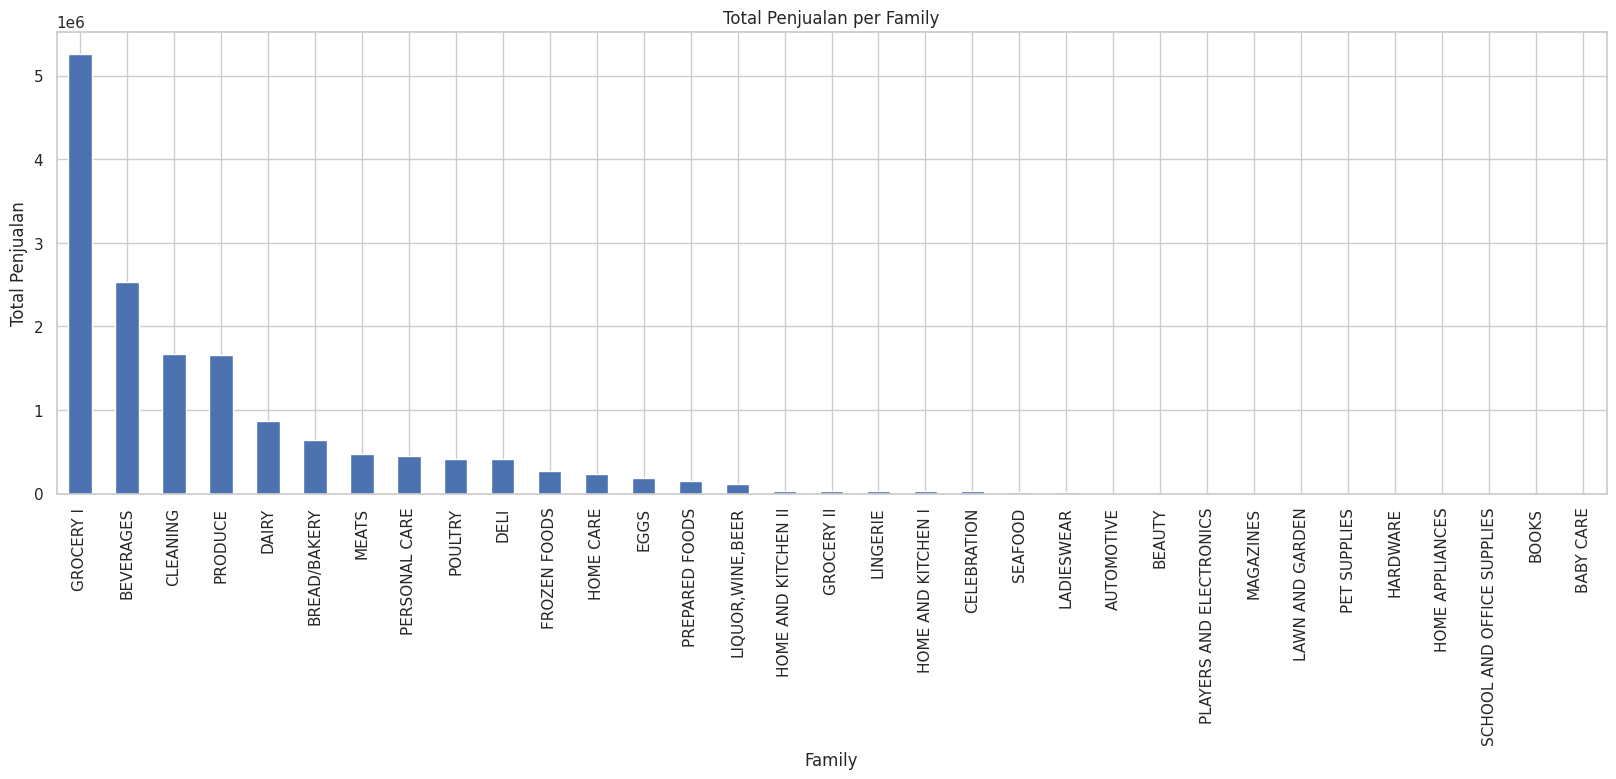

In [ ]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')

# Gunakan fungsi groupby dan sum untuk menghitung total penjualan per family
df_store.groupby('family')['sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Penjualan per Family')
plt.xlabel('Family')
plt.ylabel('Total Penjualan')
plt.show()

In [ ]:
eggs = df_store['family']=='eggs'
eggs = df_store[eggs]
eggs

Empty DataFrame
Columns: [family, sales, onpromotion, dcoilwtico]
Index: []

In [ ]:
eggs = df_store['family']=='EGGS'
eggs = df_store[eggs]
eggs

family  sales  onpromotion  dcoilwtico
date                                             
2013-01-01   EGGS    0.0            0         NaN
2013-01-02   EGGS  246.0            0       93.14
2013-01-03   EGGS  120.0            0       92.97
2013-01-04   EGGS  141.0            0       93.12
2013-01-05   EGGS  143.0            0         NaN
...           ...    ...          ...         ...
2017-08-11   EGGS   95.0           24       48.81
2017-08-12   EGGS   77.0            0         NaN
2017-08-13   EGGS  100.0            0         NaN
2017-08-14   EGGS   85.0            0       47.59
2017-08-15   EGGS   68.0            0       47.57

[1684 rows x 4 columns]

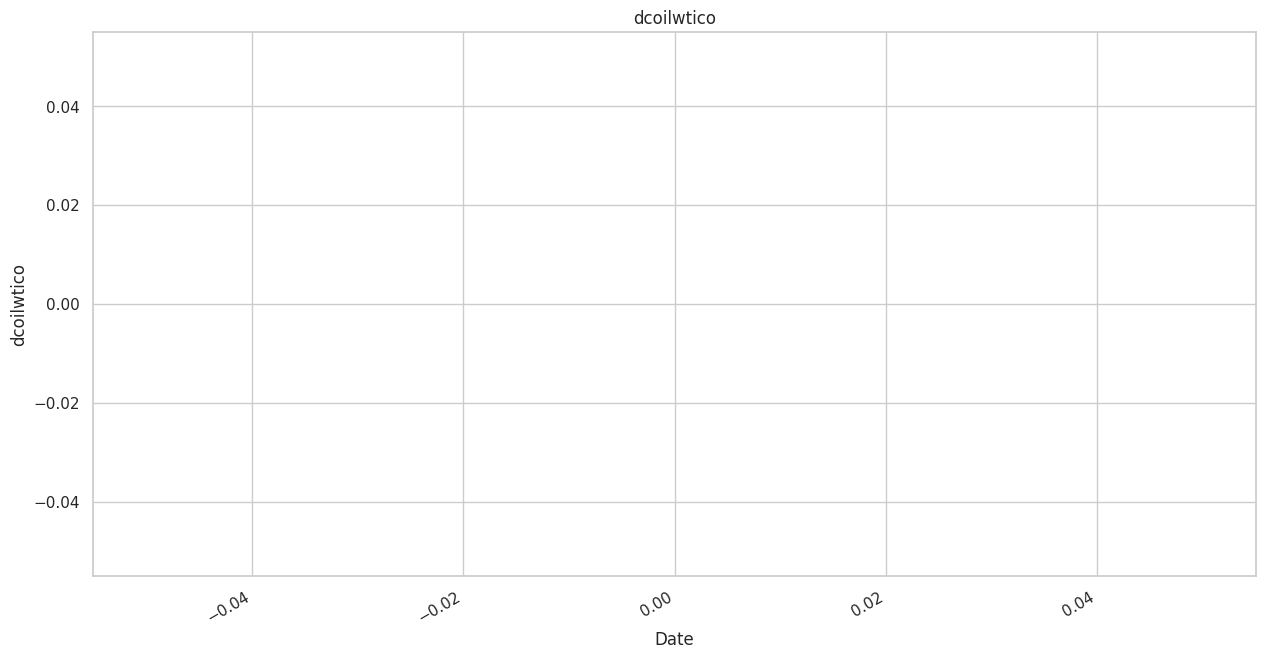

In [ ]:
# Melihat dcoilwtico
# Membuat dcoilwitco menjadi dataset terpisah, lalu mengubah indexnya
# take dcoilwitco based on date
dcoilwtico = df_store['family']=='eggs'
dcoilwtico = df_store[dcoilwtico]
# Only take date and dcoilwtico
dcoilwtico = dcoilwtico['dcoilwtico']

# Plot dcoilwtico
plt.figure (figsize=(15, 8))
dcoilwtico.plot()
plt.title('dcoilwtico')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.show()

##EDA for eggs

###Plotting eggs Sales Promotion

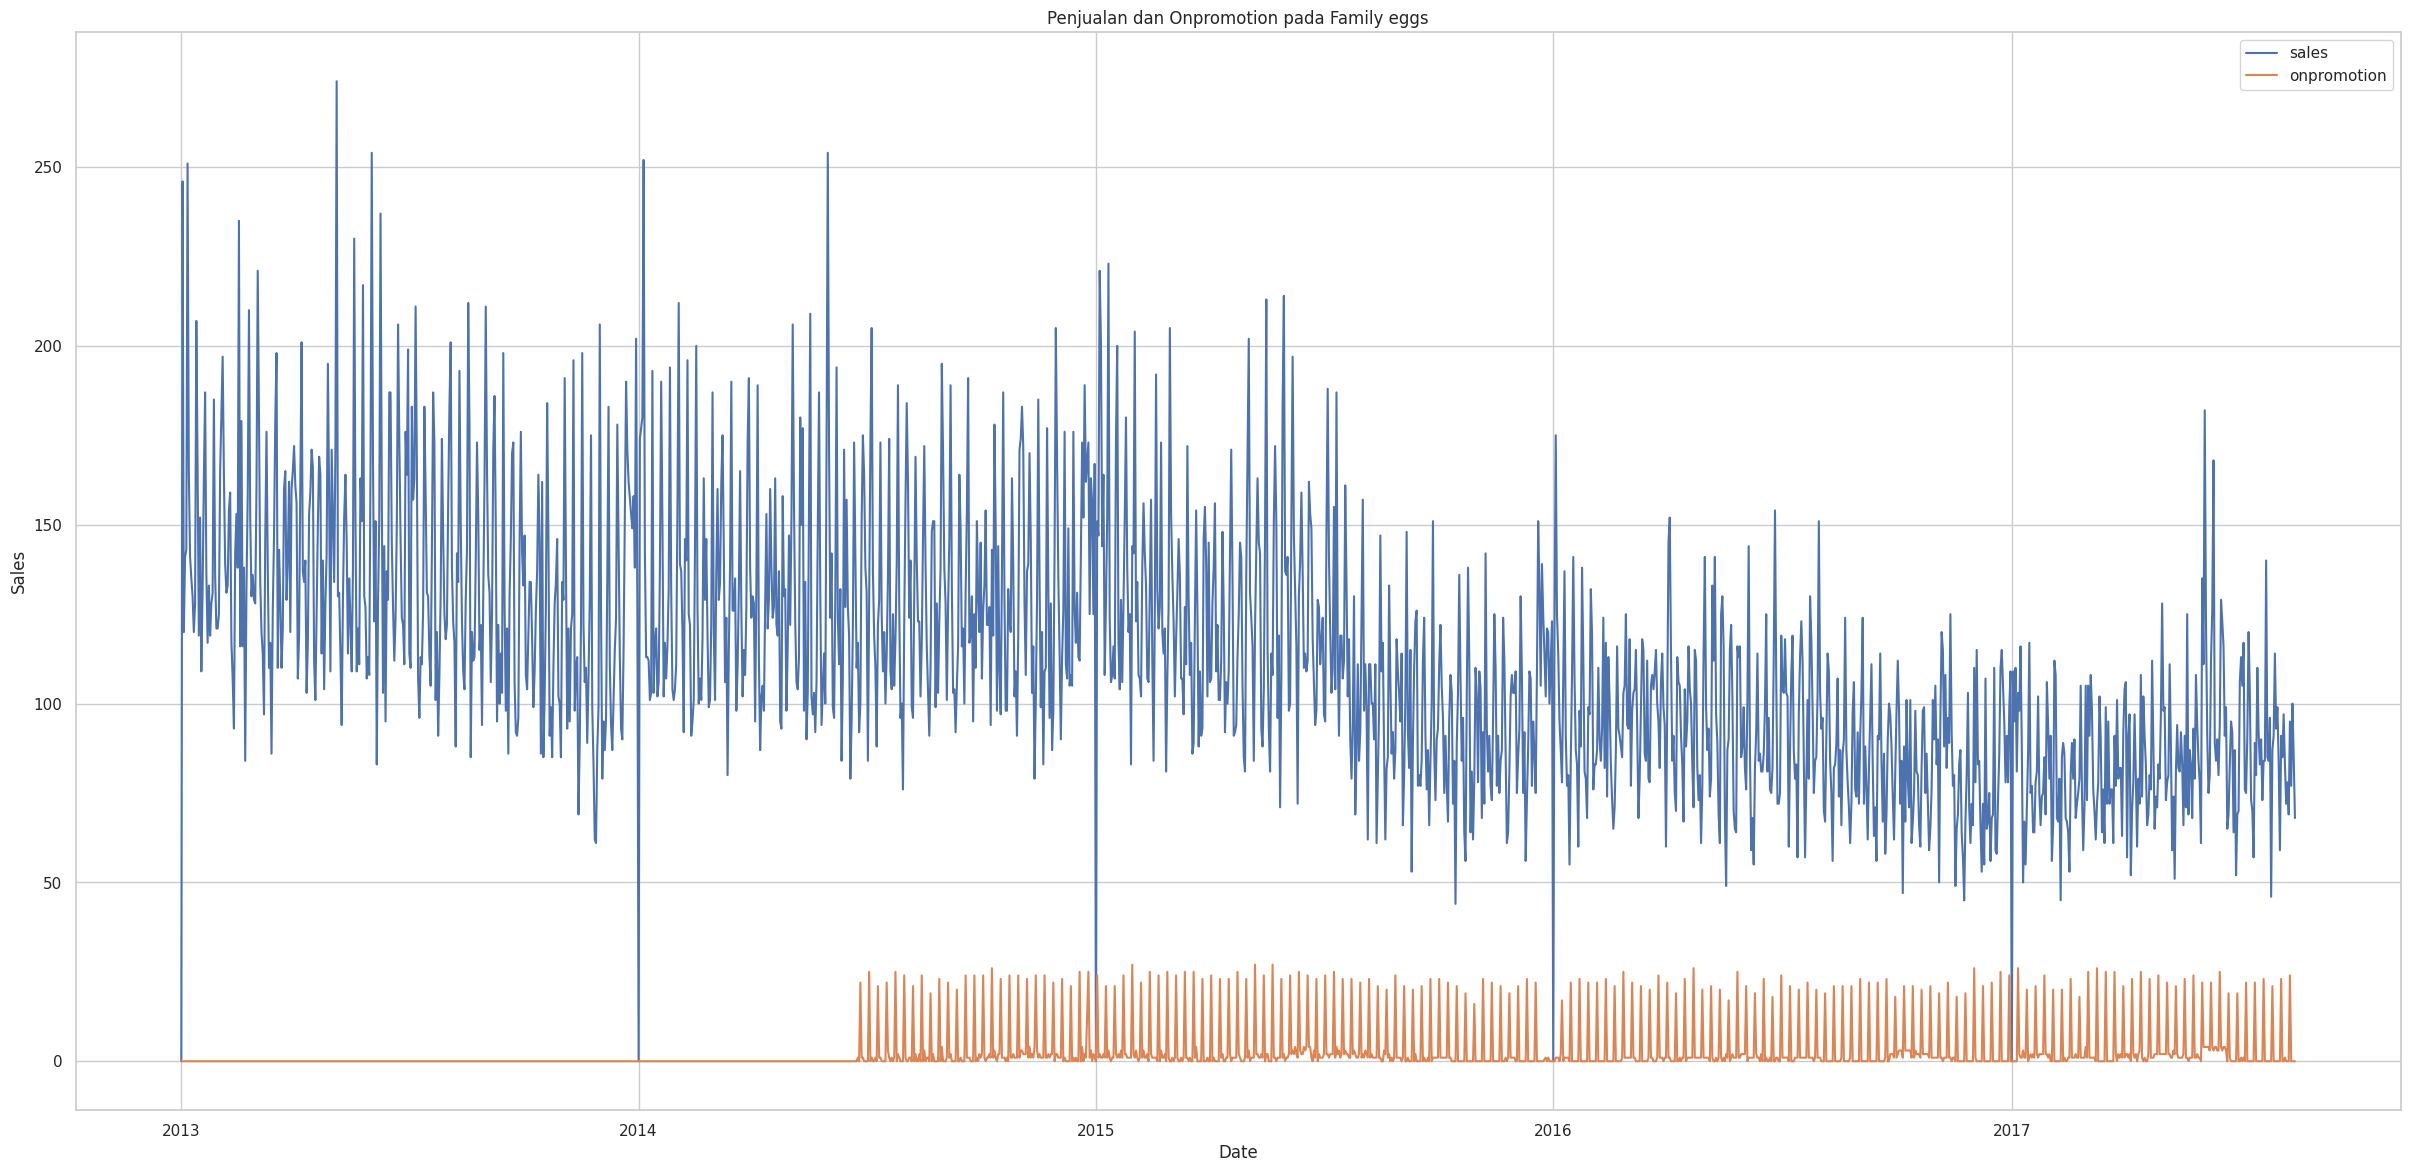

In [ ]:
plt.figure(figsize=(30,14))
sns.set(style='whitegrid')
sns.lineplot(data=eggs, x='date', y='sales', label='sales')
sns.lineplot(data=eggs, x='date', y='onpromotion', label='onpromotion')
plt.title('Penjualan dan Onpromotion pada Family eggs')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

###Plotting eggs Sales

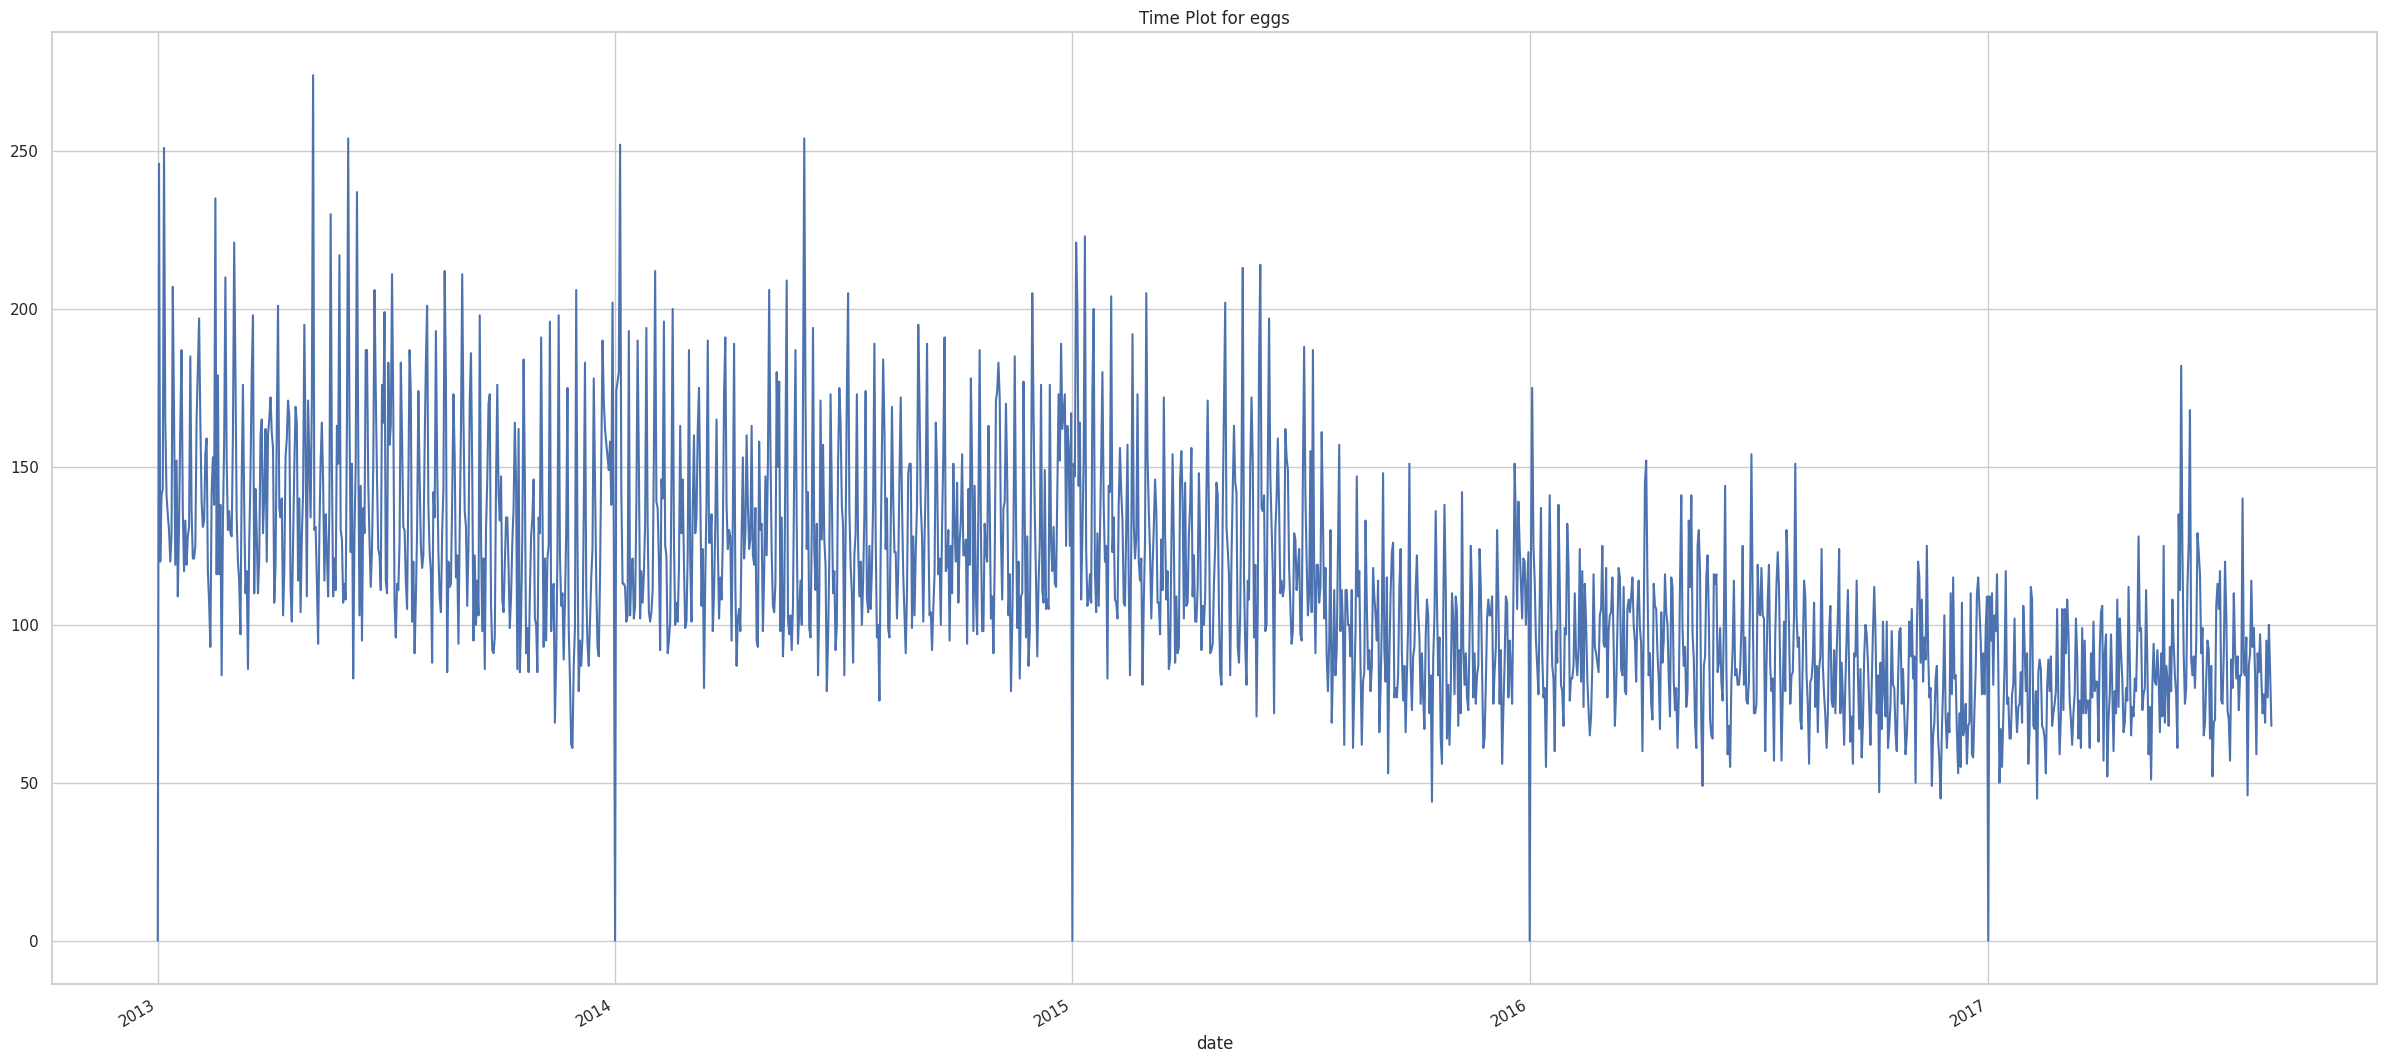

In [ ]:
fig, ax = plt.subplots(figsize=(30, 14))

eggs['sales'].plot()
plt.title('Time Plot for eggs')
plt.show()

###Disgust Date, Month, Year, and weekday via plotting

In [ ]:
eggs = eggs.copy()

In [ ]:
eggs

family  sales  onpromotion  dcoilwtico
date                                             
2013-01-01   EGGS    0.0            0         NaN
2013-01-02   EGGS  246.0            0       93.14
2013-01-03   EGGS  120.0            0       92.97
2013-01-04   EGGS  141.0            0       93.12
2013-01-05   EGGS  143.0            0         NaN
...           ...    ...          ...         ...
2017-08-11   EGGS   95.0           24       48.81
2017-08-12   EGGS   77.0            0         NaN
2017-08-13   EGGS  100.0            0         NaN
2017-08-14   EGGS   85.0            0       47.59
2017-08-15   EGGS   68.0            0       47.57

[1684 rows x 4 columns]

In [ ]:
if isinstance(eggs, pd.DataFrame):  # Check if eggs is a DataFrame
    eggs['year'] = eggs.index.year
    eggs['month'] = eggs.index.month
    eggs['week'] = eggs.index.week
    eggs['day'] = eggs.index.day
    eggs['weekday'] = eggs.index.weekday
else:
    print("eggs is not a DataFrame. Please check your data loading or creation.")

<ipython-input-32-854d469362cb>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  eggs['week'] = eggs.index.week


In [ ]:
eggs

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                        
2013-01-01   EGGS    0.0            0         NaN  2013      1     1    1   
2013-01-02   EGGS  246.0            0       93.14  2013      1     1    2   
2013-01-03   EGGS  120.0            0       92.97  2013      1     1    3   
2013-01-04   EGGS  141.0            0       93.12  2013      1     1    4   
2013-01-05   EGGS  143.0            0         NaN  2013      1     1    5   
...           ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11   EGGS   95.0           24       48.81  2017      8    32   11   
2017-08-12   EGGS   77.0            0         NaN  2017      8    32   12   
2017-08-13   EGGS  100.0            0         NaN  2017      8    32   13   
2017-08-14   EGGS   85.0            0       47.59  2017      8    33   14   
2017-08-15   EGGS   68.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

<ipython-input-34-5963b0ea6659>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='sales', data= eggs, palette='viridis')


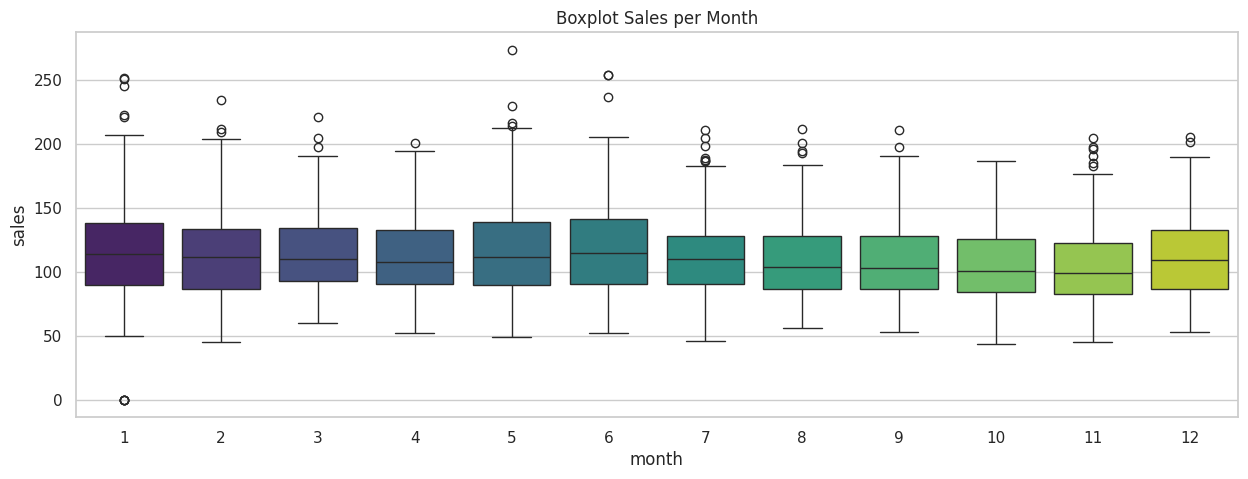

In [ ]:
# Visualisasi data berdasarkan bulan dengan boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='month', y='sales', data= eggs, palette='viridis')
plt.title('Boxplot Sales per Month')
plt.show()

<ipython-input-35-983f00b1434d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='sales', data= eggs, palette='viridis')


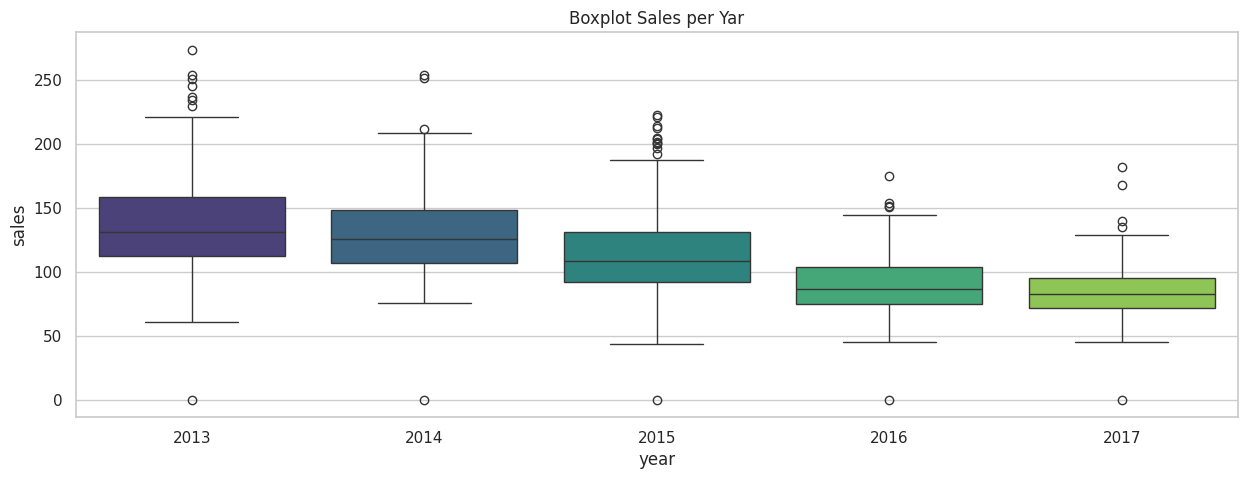

In [ ]:
# Visualisasi data berdasarkan tahun dengan boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x='year', y='sales', data= eggs, palette='viridis')
plt.title('Boxplot Sales per Yar')
plt.show()

In [ ]:
eggs

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                        
2013-01-01   EGGS    0.0            0         NaN  2013      1     1    1   
2013-01-02   EGGS  246.0            0       93.14  2013      1     1    2   
2013-01-03   EGGS  120.0            0       92.97  2013      1     1    3   
2013-01-04   EGGS  141.0            0       93.12  2013      1     1    4   
2013-01-05   EGGS  143.0            0         NaN  2013      1     1    5   
...           ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11   EGGS   95.0           24       48.81  2017      8    32   11   
2017-08-12   EGGS   77.0            0         NaN  2017      8    32   12   
2017-08-13   EGGS  100.0            0         NaN  2017      8    32   13   
2017-08-14   EGGS   85.0            0       47.59  2017      8    33   14   
2017-08-15   EGGS   68.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
print(eggs.columns)

Index(['family', 'sales', 'onpromotion', 'dcoilwtico', 'year', 'month', 'week',
       'day', 'weekday'],
      dtype='object')


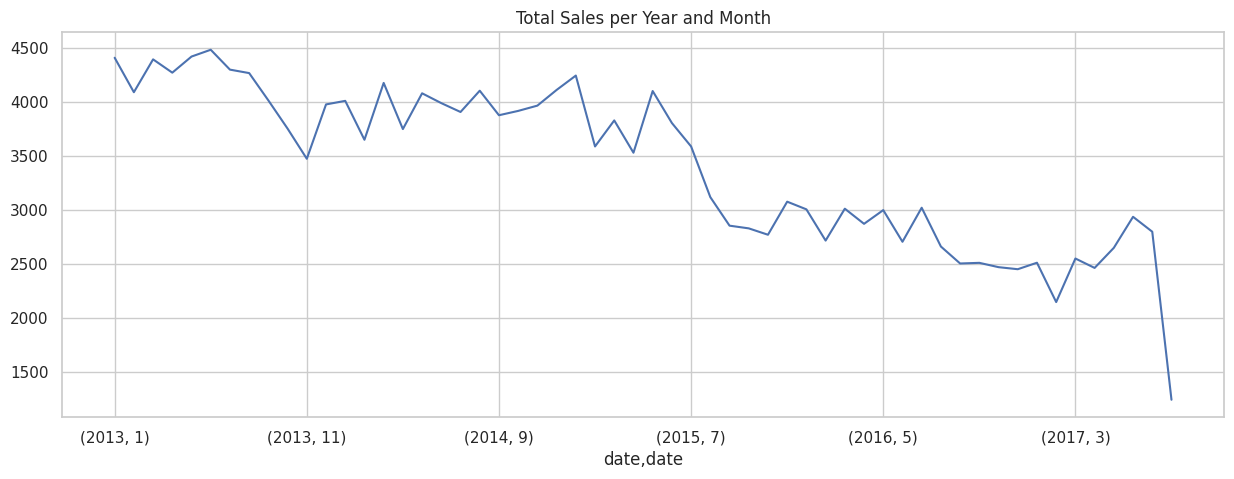

In [ ]:
# Membuat total transaksi per tahun dan bulan

# Membuat visualisasi data berdasarkan tahun dan bulan
plt.figure(figsize=(15, 5))
eggs.groupby([eggs.index.year, eggs.index.month])['sales'].sum().plot()
plt.title('Total Sales per Year and Month')
plt.show()

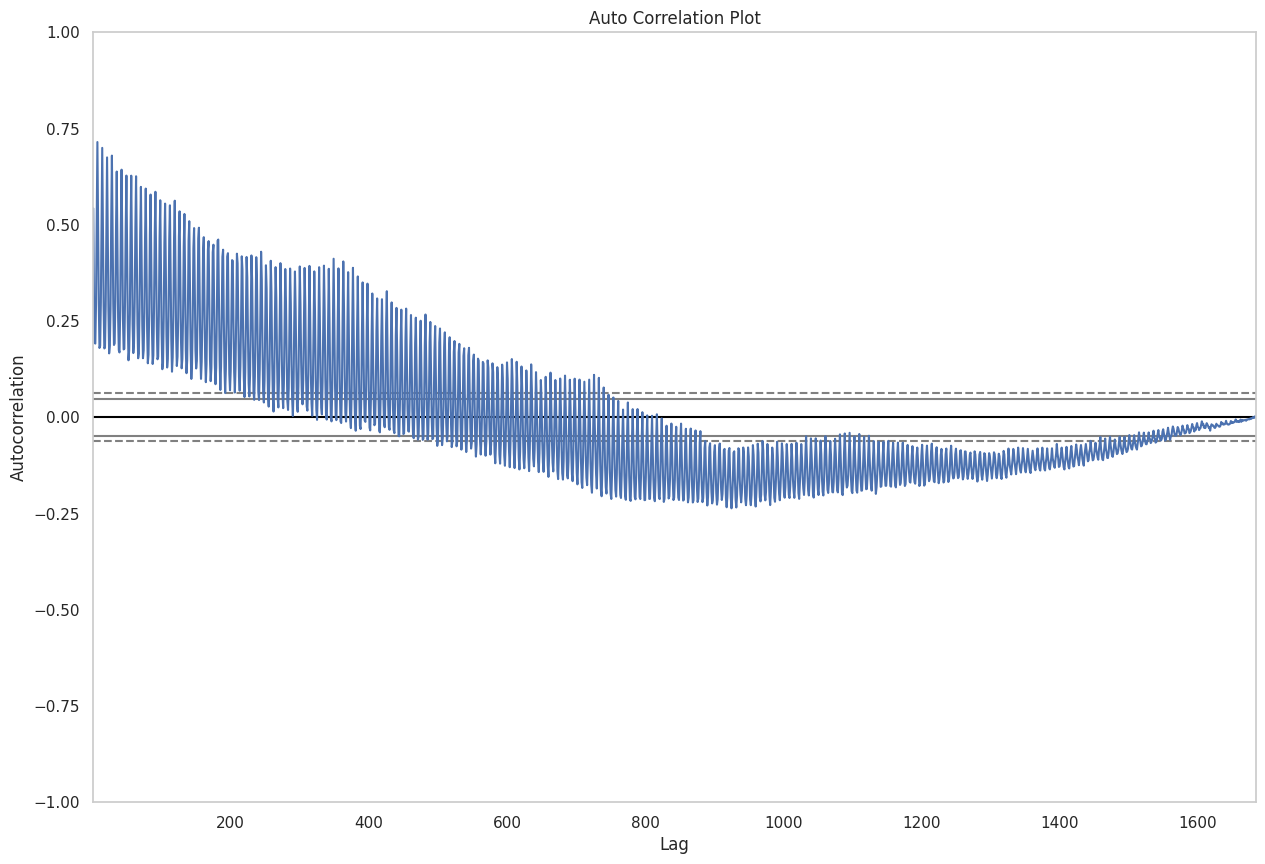

In [ ]:
#@ Auto Correlation Plot
plt.figure(figsize=(15, 10))
autocorrelation_plot(eggs['sales'])
plt.title('Auto Correlation Plot')
plt.show()

###Decomposition

<Axes: xlabel='date'>

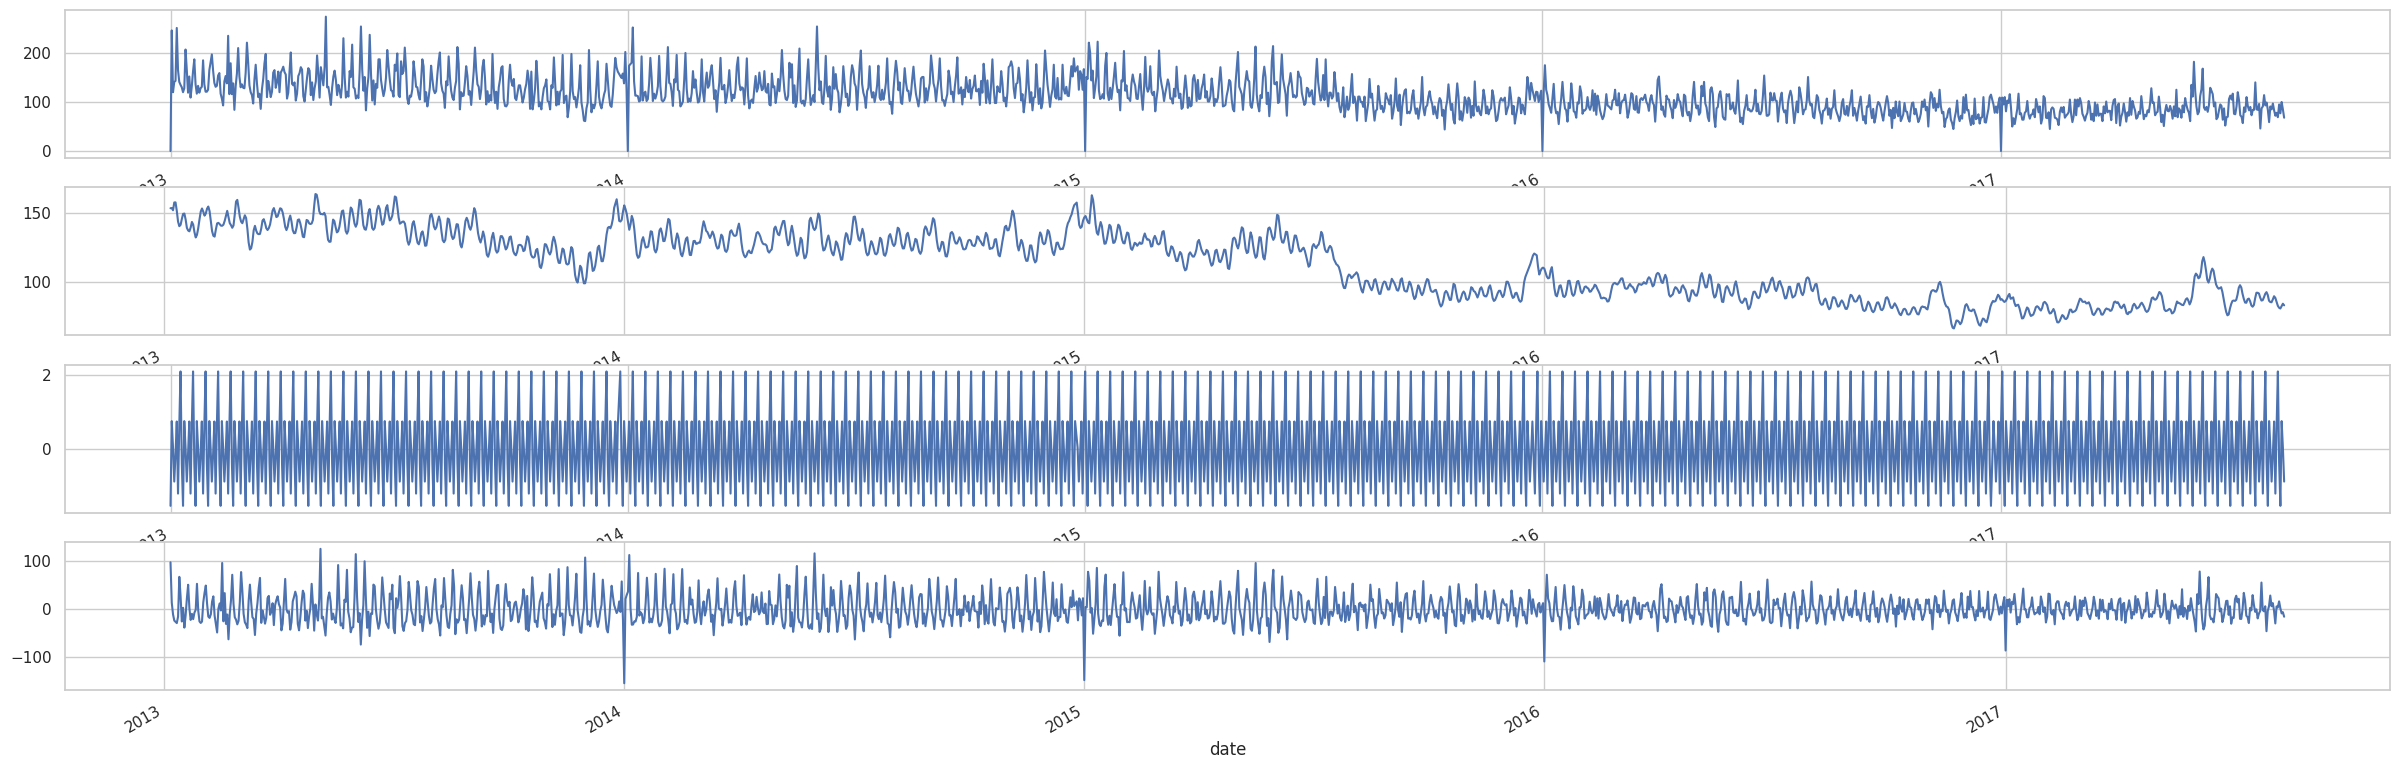

In [ ]:
# Decompose data transactions
plot_decompose = seasonal_decompose(eggs['sales'], model='additive', period=10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 10))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Axes: xlabel='date'>

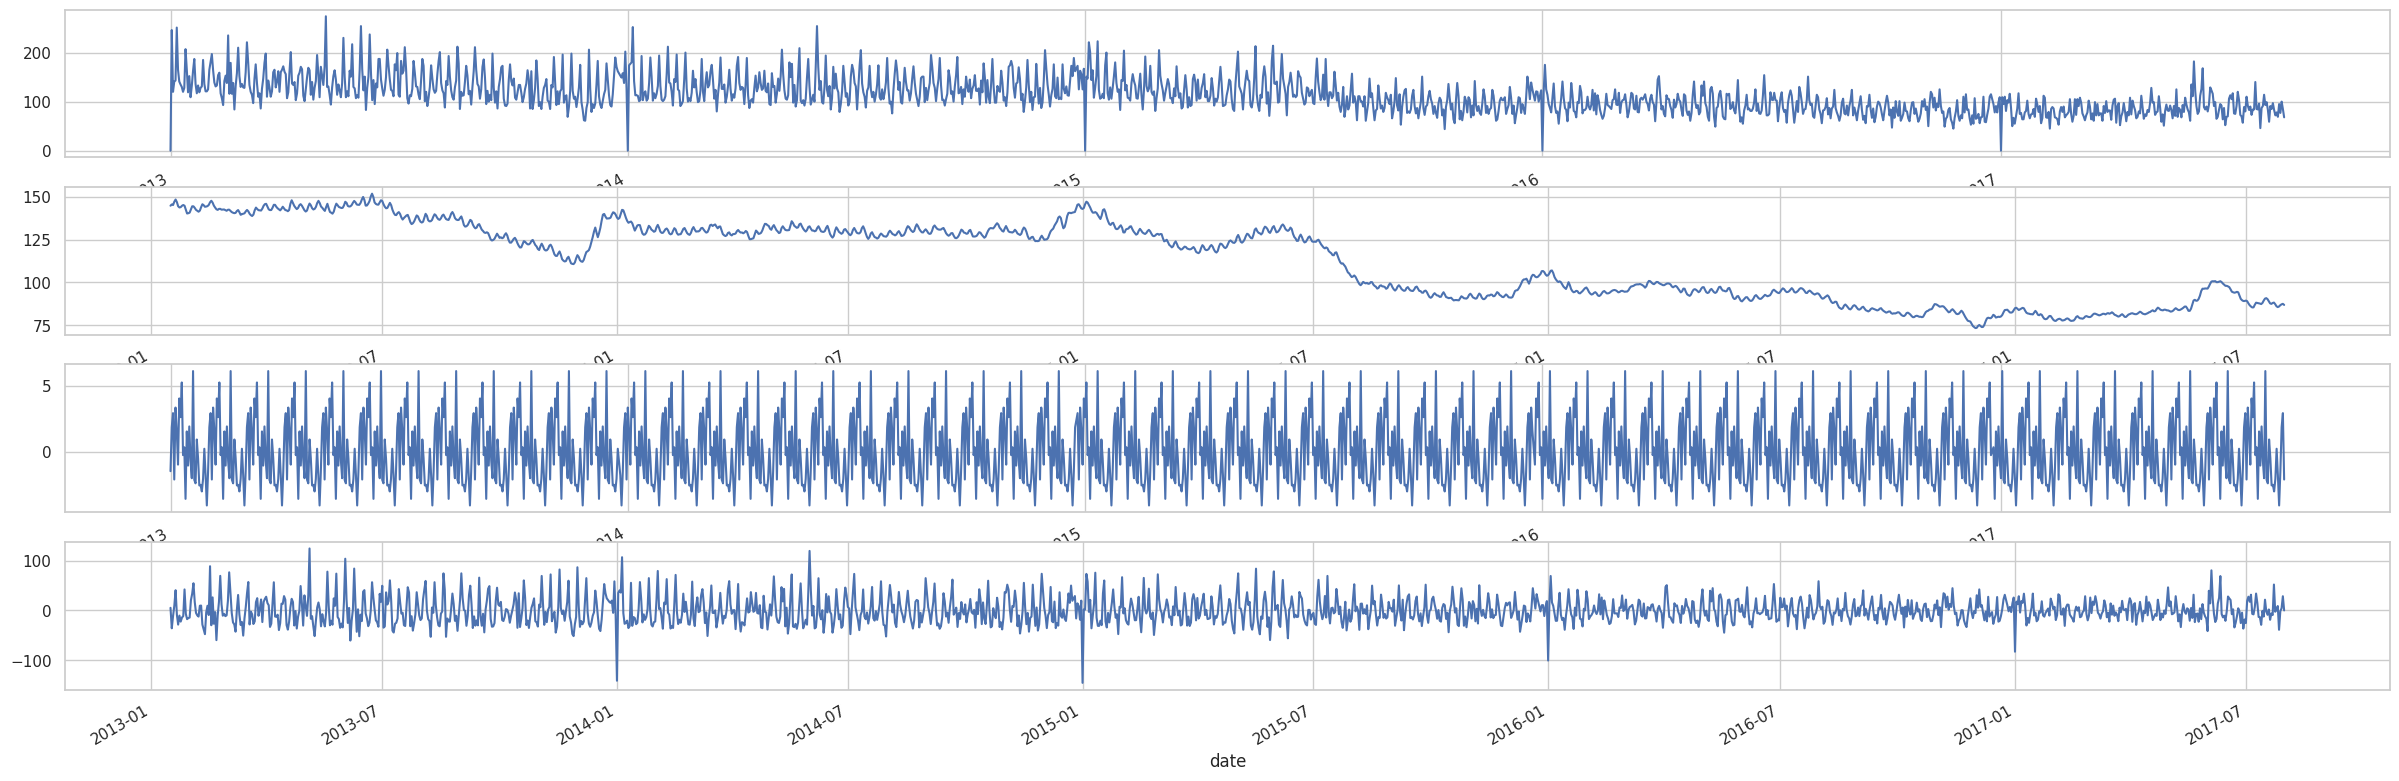

In [ ]:
# Decompose data transactions
plot_decompose = seasonal_decompose(eggs['sales'], model='additive', period=30)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 10))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Axes: xlabel='date'>

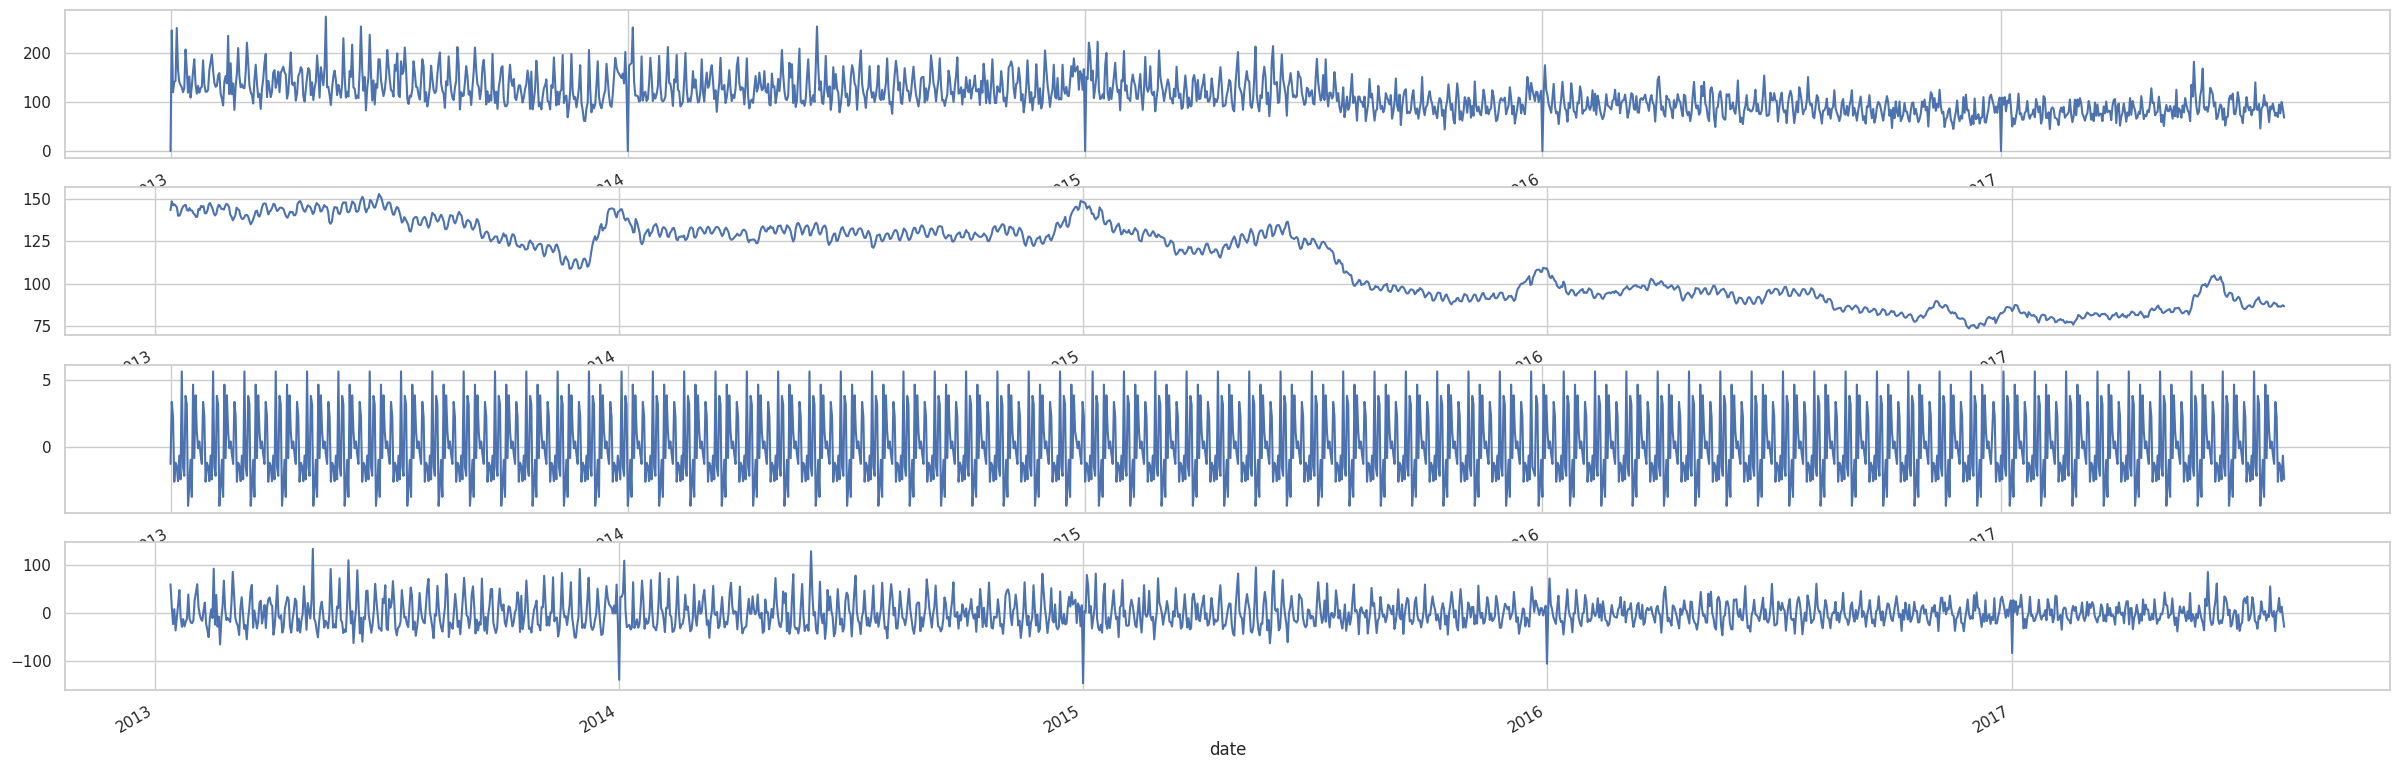

In [ ]:
# Decompose data transactions
plot_decompose = seasonal_decompose(eggs['sales'], model='additive', period=25)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 10))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Figure size 2500x1500 with 0 Axes>

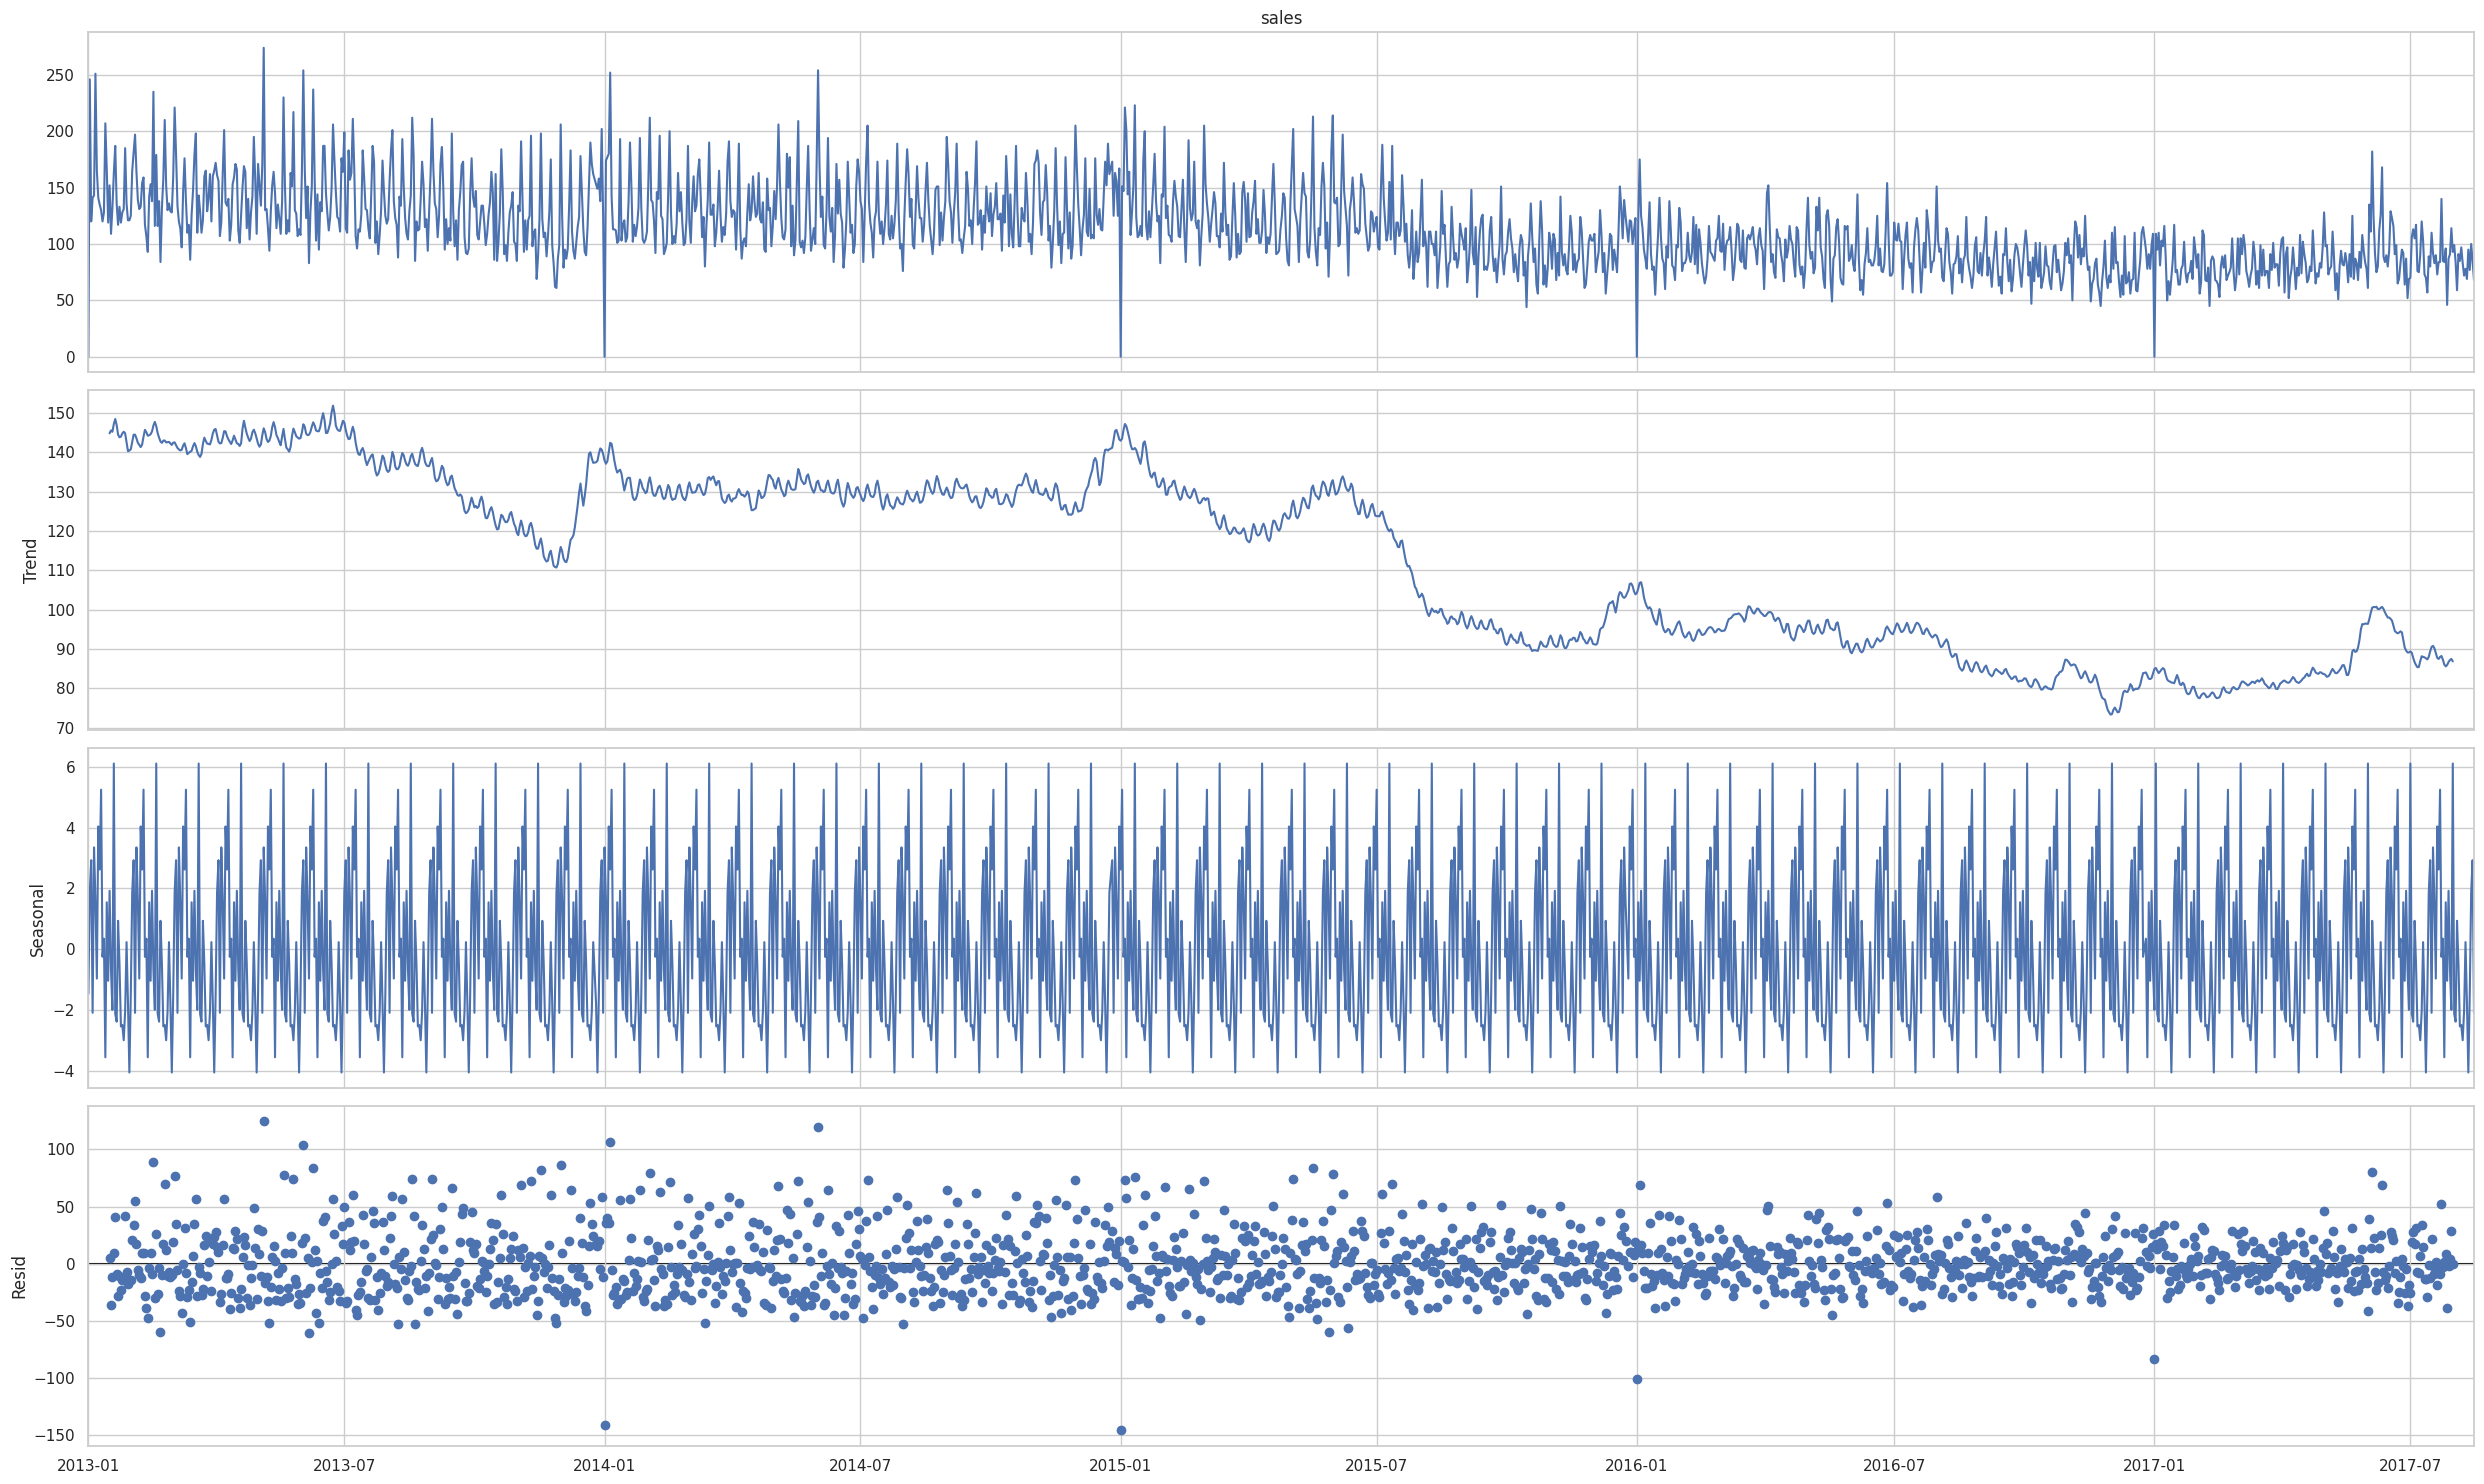

In [ ]:
# Decompose Time Series

# Make fig size bigger
plt.rcParams['figure.figsize'] = (25, 15)
# Decompose time series
decomposition = seasonal_decompose(eggs['sales'], model='additive', period=30)
fig = plt.figure()
fig = decomposition.plot()

#**2_Feature Engineering**

##Impute Empty Cell of features

In [ ]:
eggs

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                        
2013-01-01   EGGS    0.0            0         NaN  2013      1     1    1   
2013-01-02   EGGS  246.0            0       93.14  2013      1     1    2   
2013-01-03   EGGS  120.0            0       92.97  2013      1     1    3   
2013-01-04   EGGS  141.0            0       93.12  2013      1     1    4   
2013-01-05   EGGS  143.0            0         NaN  2013      1     1    5   
...           ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11   EGGS   95.0           24       48.81  2017      8    32   11   
2017-08-12   EGGS   77.0            0         NaN  2017      8    32   12   
2017-08-13   EGGS  100.0            0         NaN  2017      8    32   13   
2017-08-14   EGGS   85.0            0       47.59  2017      8    33   14   
2017-08-15   EGGS   68.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
eggs.isnull().sum()

family           0
sales            0
onpromotion      0
dcoilwtico     521
year             0
month            0
week             0
day              0
weekday          0
dtype: int64

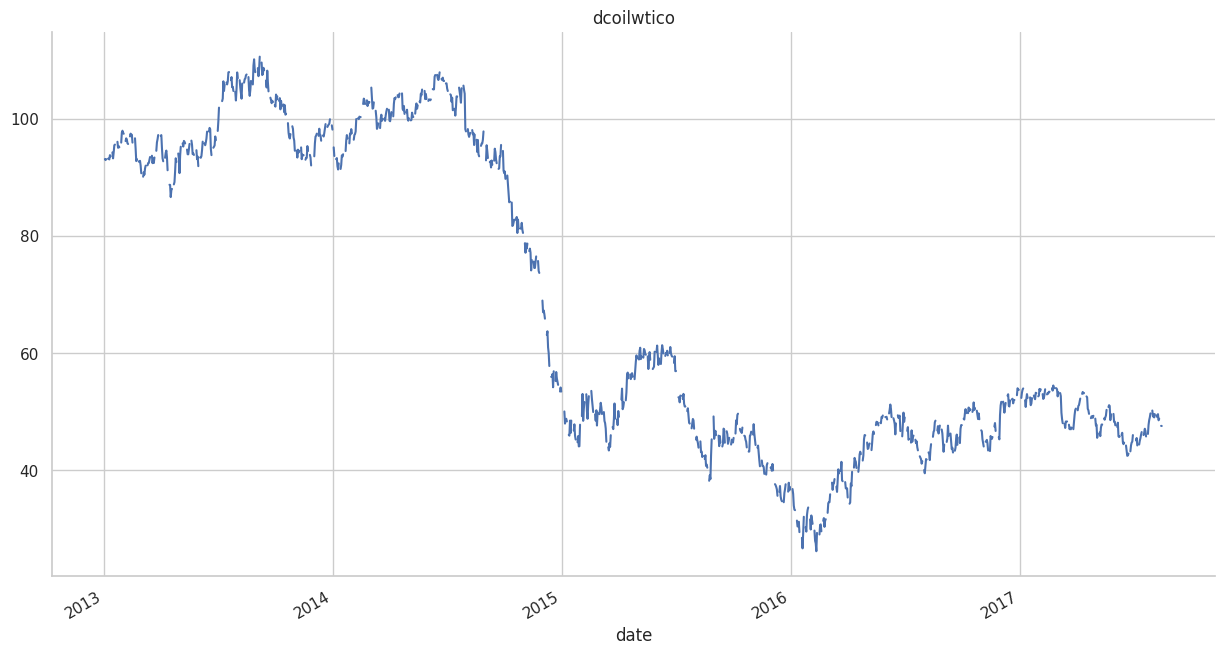

In [ ]:
eggs['dcoilwtico'].plot(kind='line', figsize=(15, 8), title='dcoilwtico')
plt.gca().spines[['top', 'right']].set_visible(False)

###Impute dcoilwtico

In [ ]:
eggs['dcoilwtico'] = eggs['dcoilwtico'].fillna(method='ffill')
eggs

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                        
2013-01-01   EGGS    0.0            0         NaN  2013      1     1    1   
2013-01-02   EGGS  246.0            0       93.14  2013      1     1    2   
2013-01-03   EGGS  120.0            0       92.97  2013      1     1    3   
2013-01-04   EGGS  141.0            0       93.12  2013      1     1    4   
2013-01-05   EGGS  143.0            0       93.12  2013      1     1    5   
...           ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11   EGGS   95.0           24       48.81  2017      8    32   11   
2017-08-12   EGGS   77.0            0       48.81  2017      8    32   12   
2017-08-13   EGGS  100.0            0       48.81  2017      8    32   13   
2017-08-14   EGGS   85.0            0       47.59  2017      8    33   14   
2017-08-15   EGGS   68.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
eggs['dcoilwtico'] = eggs['dcoilwtico'].fillna(method='backfill')
eggs

family  sales  onpromotion  dcoilwtico  year  month  week  day  \
date                                                                        
2013-01-01   EGGS    0.0            0       93.14  2013      1     1    1   
2013-01-02   EGGS  246.0            0       93.14  2013      1     1    2   
2013-01-03   EGGS  120.0            0       92.97  2013      1     1    3   
2013-01-04   EGGS  141.0            0       93.12  2013      1     1    4   
2013-01-05   EGGS  143.0            0       93.12  2013      1     1    5   
...           ...    ...          ...         ...   ...    ...   ...  ...   
2017-08-11   EGGS   95.0           24       48.81  2017      8    32   11   
2017-08-12   EGGS   77.0            0       48.81  2017      8    32   12   
2017-08-13   EGGS  100.0            0       48.81  2017      8    32   13   
2017-08-14   EGGS   85.0            0       47.59  2017      8    33   14   
2017-08-15   EGGS   68.0            0       47.57  2017      8    33   15   

            weekday  
date                 
2013-01-01        1  
2013-01-02        2  
2013-01-03        3  
2013-01-04        4  
2013-01-05        5  
...             ...  
2017-08-11        4  
2017-08-12        5  
2017-08-13        6  
2017-08-14        0  
2017-08-15        1  

[1684 rows x 9 columns]

In [ ]:
eggs.isnull().sum()

family         0
sales          0
onpromotion    0
dcoilwtico     0
year           0
month          0
week           0
day            0
weekday        0
dtype: int64

In [ ]:
eggs = eggs.drop('family', axis=1)

In [ ]:
eggs

sales  onpromotion  dcoilwtico  year  month  week  day  weekday
date                                                                       
2013-01-01    0.0            0       93.14  2013      1     1    1        1
2013-01-02  246.0            0       93.14  2013      1     1    2        2
2013-01-03  120.0            0       92.97  2013      1     1    3        3
2013-01-04  141.0            0       93.12  2013      1     1    4        4
2013-01-05  143.0            0       93.12  2013      1     1    5        5
...           ...          ...         ...   ...    ...   ...  ...      ...
2017-08-11   95.0           24       48.81  2017      8    32   11        4
2017-08-12   77.0            0       48.81  2017      8    32   12        5
2017-08-13  100.0            0       48.81  2017      8    32   13        6
2017-08-14   85.0            0       47.59  2017      8    33   14        0
2017-08-15   68.0            0       47.57  2017      8    33   15        1

[1684 rows x 8 columns]

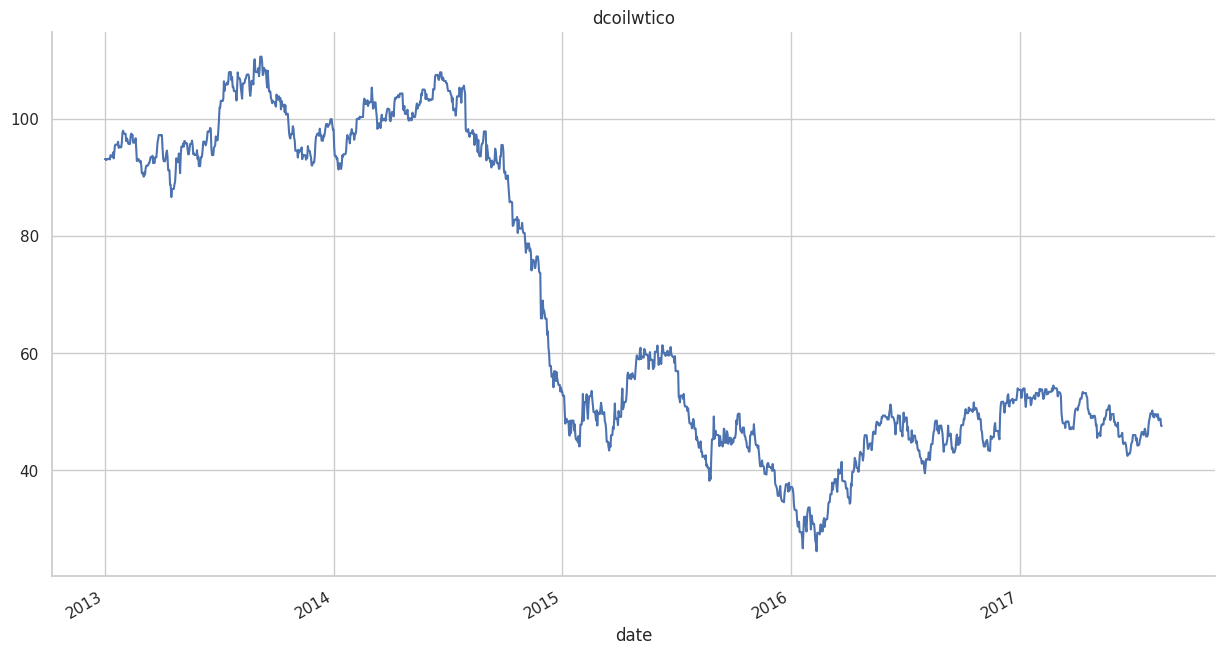

In [ ]:
eggs['dcoilwtico'].plot(kind='line', figsize=(15, 8), title='dcoilwtico')
plt.gca().spines[['top', 'right']].set_visible(False)

##Rolling Window Methode

In [ ]:
# Menambahkan rolling window mean pada sales sepanjang 7 hari
eggs['sales_mean_7'] = eggs['sales'].rolling(window=7).mean()
# Menambahkan rolling window mean pada sales sepanjang 30 hari
eggs['sales_mean_30'] = eggs['sales'].rolling(window=30).mean()
eggs

sales  onpromotion  dcoilwtico  year  month  week  day  weekday  \
date                                                                          
2013-01-01    0.0            0       93.14  2013      1     1    1        1   
2013-01-02  246.0            0       93.14  2013      1     1    2        2   
2013-01-03  120.0            0       92.97  2013      1     1    3        3   
2013-01-04  141.0            0       93.12  2013      1     1    4        4   
2013-01-05  143.0            0       93.12  2013      1     1    5        5   
...           ...          ...         ...   ...    ...   ...  ...      ...   
2017-08-11   95.0           24       48.81  2017      8    32   11        4   
2017-08-12   77.0            0       48.81  2017      8    32   12        5   
2017-08-13  100.0            0       48.81  2017      8    32   13        6   
2017-08-14   85.0            0       47.59  2017      8    33   14        0   
2017-08-15   68.0            0       47.57  2017      8    33   15        1   

            sales_mean_7  sales_mean_30  
date                                     
2013-01-01           NaN            NaN  
2013-01-02           NaN            NaN  
2013-01-03           NaN            NaN  
2013-01-04           NaN            NaN  
2013-01-05           NaN            NaN  
...                  ...            ...  
2017-08-11     82.714286      86.333333  
2017-08-12     81.571429      87.000000  
2017-08-13     82.000000      87.366667  
2017-08-14     82.285714      87.533333  
2017-08-15     81.714286      86.133333  

[1684 rows x 10 columns]

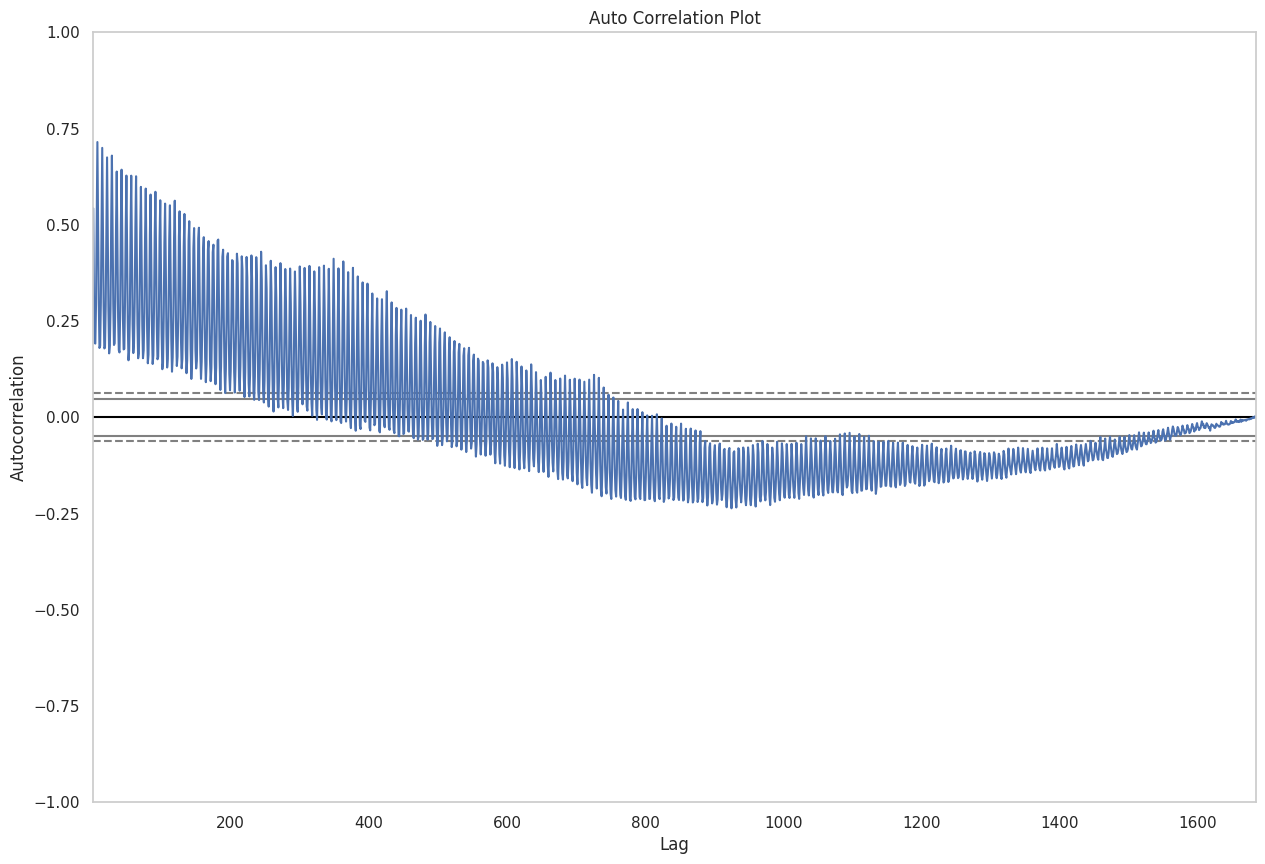

In [ ]:
plt.figure(figsize=(15, 10))
autocorrelation_plot(eggs['sales'])
plt.title('Auto Correlation Plot')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(eggs['sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.860447
p-value: 0.350891


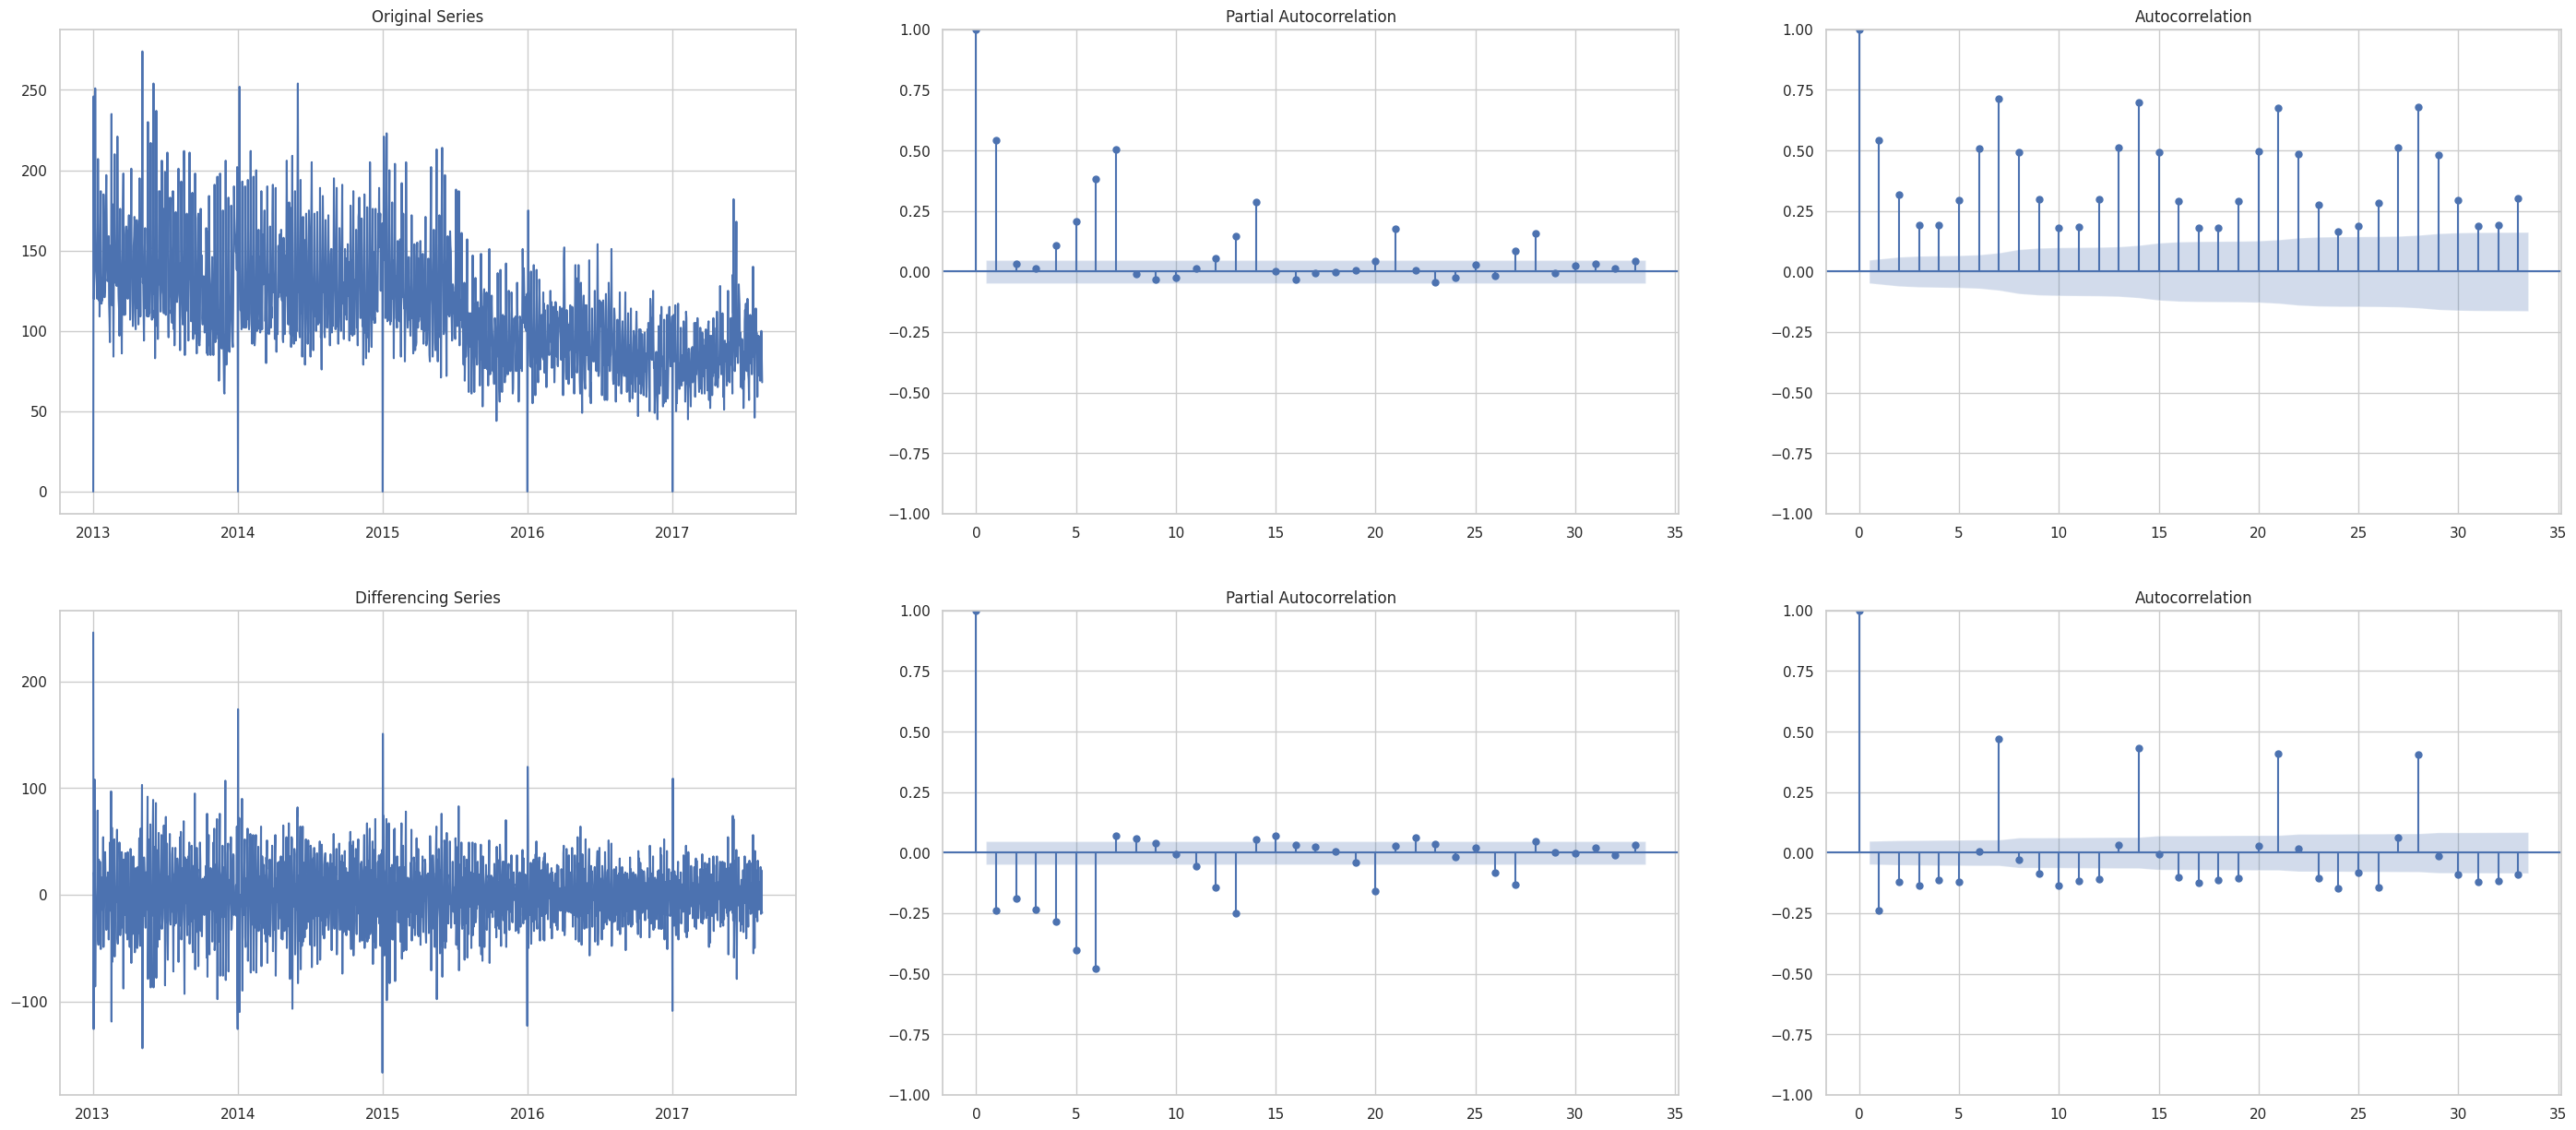

In [ ]:
# Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(35, 15))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(eggs['sales'])
ax[0, 1] = plot_pacf(eggs['sales'], ax=ax[0, 1])
ax[0, 2] = plot_acf(eggs['sales'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(eggs['sales'].diff().dropna())
ax[1, 1] = plot_pacf(eggs['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(eggs['sales'].diff().dropna(), ax=ax[1, 2])

plt.show()

#3_Modelling

##Split Data into Training & Test

In [ ]:
# Split data menjadi data training dan data testing
train = eggs[:-30]
test = eggs[-30:]
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1654, 10)
Test shape: (30, 10)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

##ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

modelArima = ARIMA(train['sales'], order=(7,1,1))
modelArima_fit = modelArima.fit()
print(modelArima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1654
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -7512.204
Date:                Fri, 15 Mar 2024   AIC                          15042.408
Time:                        12:02:00   BIC                          15091.101
Sample:                             0   HQIC                         15060.460
                               - 1654                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1396      0.022      6.446      0.000       0.097       0.182
ar.L2         -0.0630      0.020     -3.089      0.002      -0.103      -0.023
ar.L3         -0.0961      0.021     -4.481      0.0

###Plot Residual

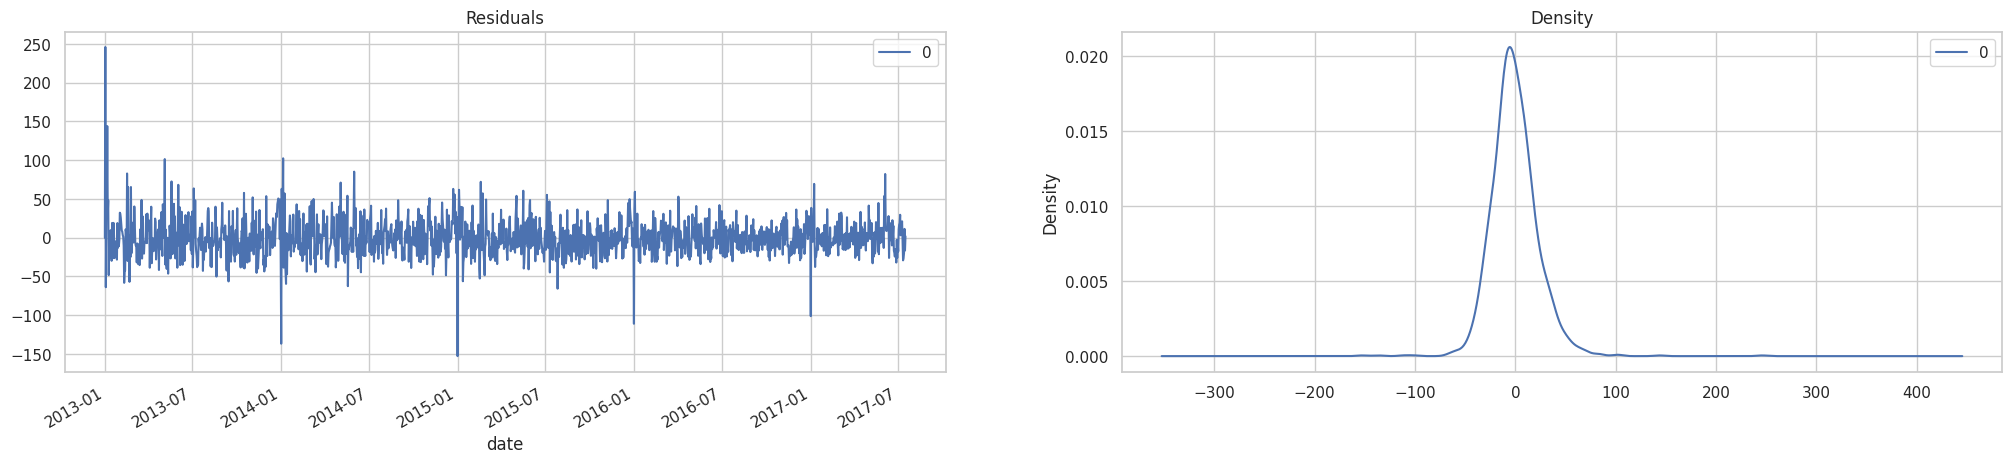

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelArima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


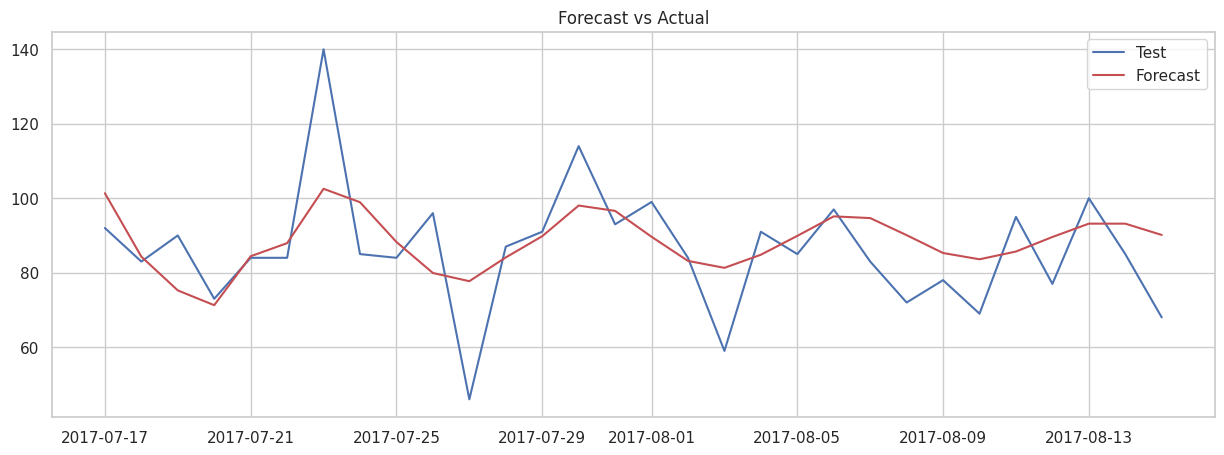

In [ ]:
# Predict data
# Forecast
forecast = modelArima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastARIMA = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastARIMA

test    forecast
date                         
2017-07-17   92.0  101.345474
2017-07-18   83.0   84.312476
2017-07-19   90.0   75.244283
2017-07-20   73.0   71.276733
2017-07-21   84.0   84.426656
2017-07-22   84.0   87.935378
2017-07-23  140.0  102.540293
2017-07-24   85.0   98.930902
2017-07-25   84.0   88.257290
2017-07-26   96.0   79.923308
2017-07-27   46.0   77.720782
2017-07-28   87.0   84.101915
2017-07-29   91.0   89.799539
2017-07-30  114.0   98.040266
2017-07-31   93.0   96.603875
2017-08-01   99.0   89.650303
2017-08-02   84.0   83.171310
2017-08-03   59.0   81.304125
2017-08-04   91.0   84.825121
2017-08-05   85.0   89.893919
2017-08-06   97.0   95.130009
2017-08-07   83.0   94.673184
2017-08-08   72.0   90.085133
2017-08-09   78.0   85.290561
2017-08-10   69.0   83.607030
2017-08-11   95.0   85.684800
2017-08-12   77.0   89.591413
2017-08-13  100.0   93.175617
2017-08-14   85.0   93.173564
2017-08-15   68.0   90.138859

##Auto ARIMA

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
modelAutoArima = pm.auto_arima(train['sales'],
                      start_p=1,        # nilai p pertama
                      start_d=1,        # nilai d pertama
                      start_q=1,        # nilai q pertama
                      test='adf',       # gunakan adftest untuk mencari optimal 'd'
                      max_p=30,          # maksimal p
                      max_d=5,          # maksimal d
                      max_q=10,          # maksimal q
                      #d=2,           # let model determine 'd'
                      m=6,             # frequency of series
                      seasonal=False,    # Seasonality
                      start_P=1,        # nilai P pertama
                      D=1,           # let model determine 'D'
                      start_Q=1,        # nilai Q pertama
                      max_P=11,          # maksimal P
                      max_D=1,          # maksimal D
                      max_Q=1,          # maksimal Q
                      trace=True,       # print result
                      error_action='ignore',    # we don't want to know if an order does not work
                      suppress_warnings=True,   # we don't want convergence warnings
                      stepwise=True)        # set to stepwise

print(modelAutoArima.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (6) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=15791.761, Time=1.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20512.592, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16334.806, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18870.504, Time=1.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=15673.106, Time=2.40 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16250.308, Time=0.76 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=15616.210, Time=4.58 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16198.225, Time=1.39 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=15510.572, Time=3.98 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=16108.247, Time=0.97 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=15420.929, Time=5.31 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=1.92 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=15323.411, Time=7.32 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=inf, Time=3.37 sec
 ARIMA(7,0,1)(0,0,0)[0]        

In [ ]:
modelAutoArima = ARIMA(train['sales'], order=(7,0,0))
modelAutoArima_fit = modelAutoArima.fit()
print(modelArima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1654
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -7512.204
Date:                Fri, 15 Mar 2024   AIC                          15042.408
Time:                        12:04:54   BIC                          15091.101
Sample:                             0   HQIC                         15060.460
                               - 1654                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1396      0.022      6.446      0.000       0.097       0.182
ar.L2         -0.0630      0.020     -3.089      0.002      -0.103      -0.023
ar.L3         -0.0961      0.021     -4.481      0.0

###Plot Residual

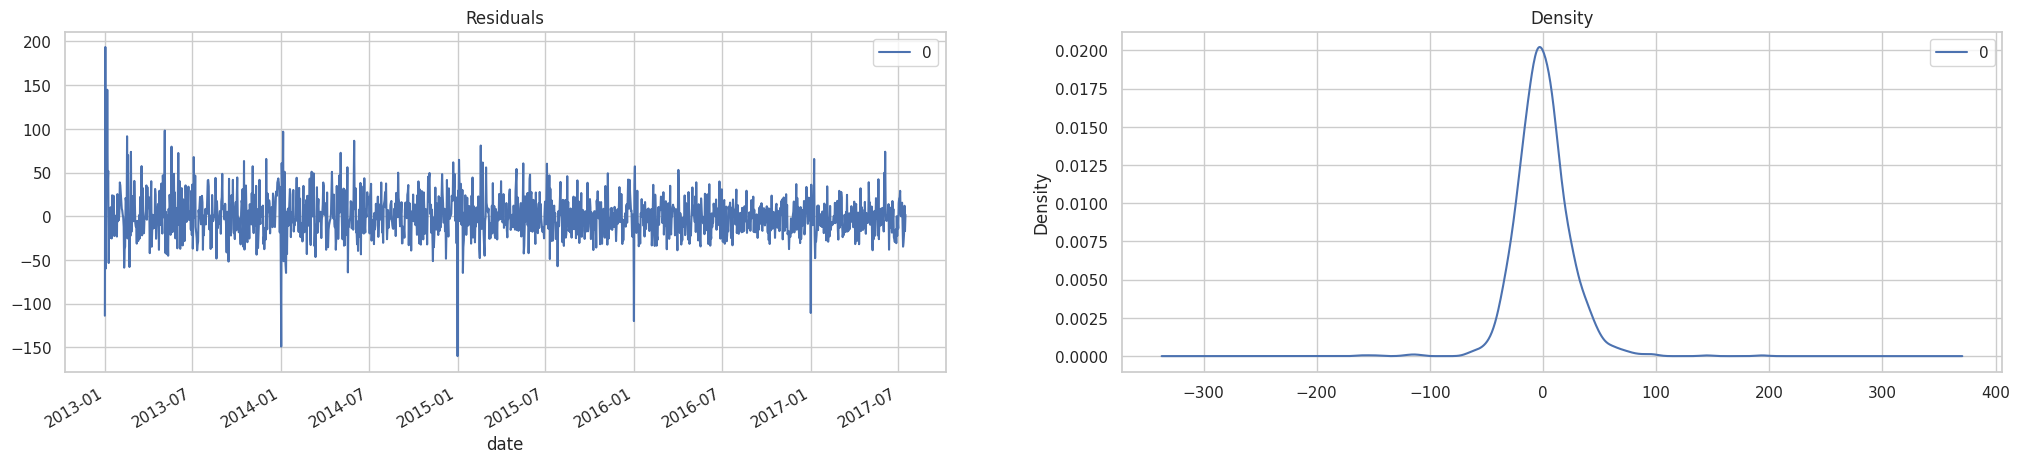

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelAutoArima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


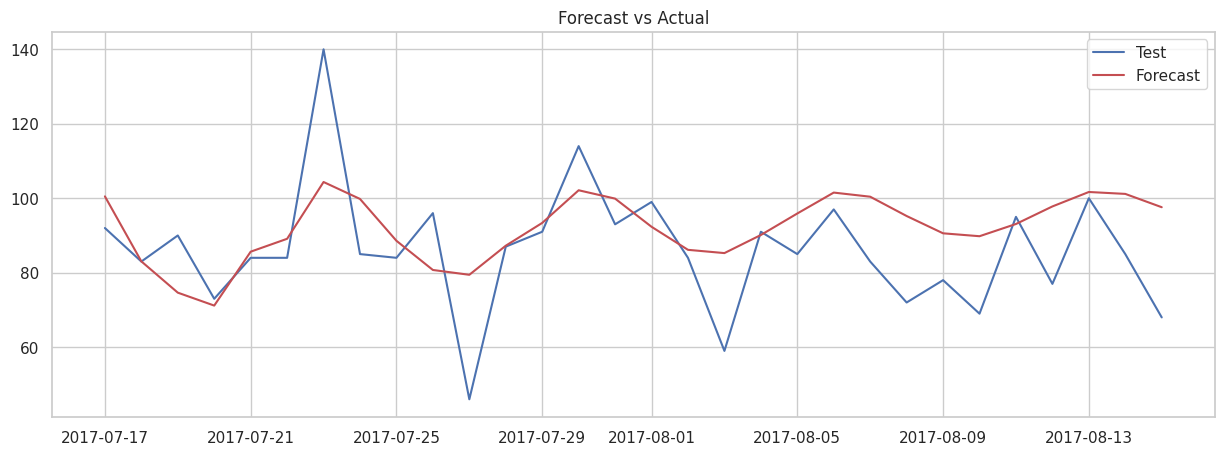

In [ ]:
# Predict data
# Forecast
forecast = modelAutoArima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastAutoArima = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastAutoArima

test    forecast
date                         
2017-07-17   92.0  100.501899
2017-07-18   83.0   83.042161
2017-07-19   90.0   74.643931
2017-07-20   73.0   71.171074
2017-07-21   84.0   85.646916
2017-07-22   84.0   89.110661
2017-07-23  140.0  104.360200
2017-07-24   85.0   99.808872
2017-07-25   84.0   88.572271
2017-07-26   96.0   80.733291
2017-07-27   46.0   79.440755
2017-07-28   87.0   87.254317
2017-07-29   91.0   93.374629
2017-07-30  114.0  102.142309
2017-07-31   93.0   99.899415
2017-08-01   99.0   92.334334
2017-08-02   84.0   86.144606
2017-08-03   59.0   85.269233
2017-08-04   91.0   90.127545
2017-08-05   85.0   95.905667
2017-08-06   97.0  101.519195
2017-08-07   83.0  100.412183
2017-08-08   72.0   95.226983
2017-08-09   78.0   90.580743
2017-08-10   69.0   89.800527
2017-08-11   95.0   93.083741
2017-08-12   77.0   97.798410
2017-08-13  100.0  101.678366
2017-08-14   85.0  101.166281
2017-08-15   68.0   97.590370

##SARIMA

In [ ]:
# Seasonal ARIMA X (SARIMAX)
modelSarima = ARIMA(train['sales'], order=(7, 0, 0), seasonal_order=(0, 1, 1, 2))
modelSarima_fit = modelSarima.fit()
print(modelSarima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1654
Model:             ARIMA(7, 0, 0)x(0, 1, [1], 2)   Log Likelihood               -7518.752
Date:                           Fri, 15 Mar 2024   AIC                          15055.504
Time:                                   12:07:00   BIC                          15104.192
Sample:                                        0   HQIC                         15073.554
                                          - 1654                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1569      0.019      8.121      0.000       0.119       0.195
ar.L2         -0.0553      0.020     -2.791

###Plot Residual

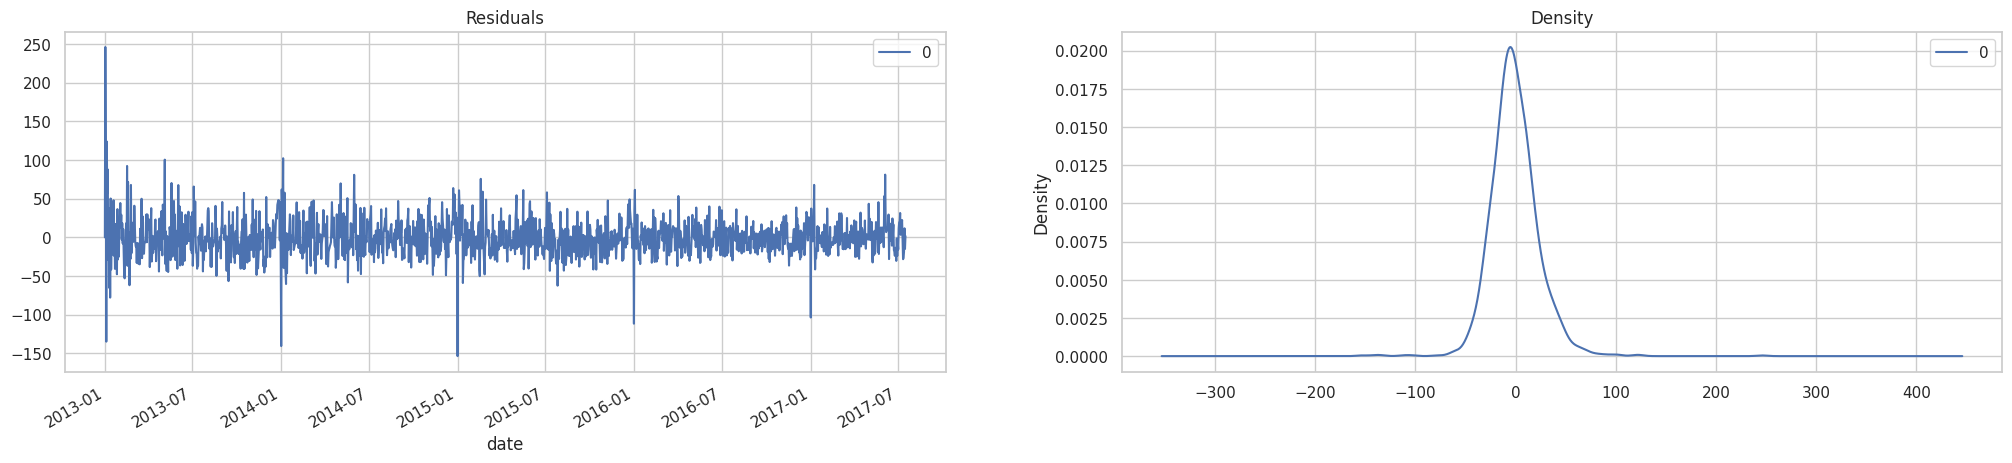

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelSarima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


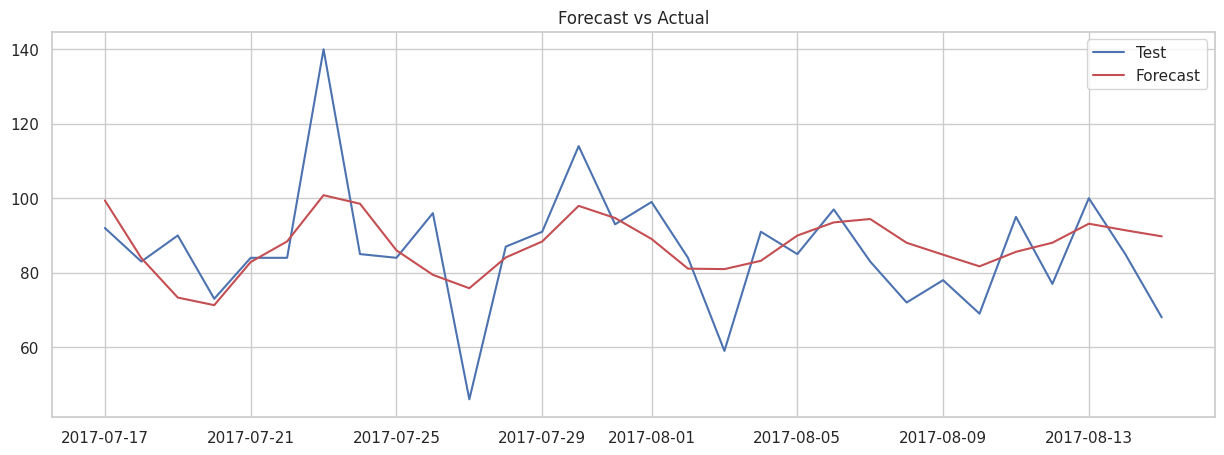

In [ ]:
# Predict data
# Forecast
forecast = modelSarima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastSarima = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastSarima

test    forecast
date                         
2017-07-17   92.0   99.401162
2017-07-18   83.0   83.918137
2017-07-19   90.0   73.323641
2017-07-20   73.0   71.283781
2017-07-21   84.0   82.868274
2017-07-22   84.0   88.404869
2017-07-23  140.0  100.814761
2017-07-24   85.0   98.518834
2017-07-25   84.0   86.007185
2017-07-26   96.0   79.435249
2017-07-27   46.0   75.830413
2017-07-28   87.0   84.094619
2017-07-29   91.0   88.388858
2017-07-30  114.0   97.952253
2017-07-31   93.0   94.684307
2017-08-01   99.0   89.063536
2017-08-02   84.0   81.093744
2017-08-03   59.0   80.966884
2017-08-04   91.0   83.202604
2017-08-05   85.0   89.978614
2017-08-06   97.0   93.513535
2017-08-07   83.0   94.419646
2017-08-08   72.0   88.037471
2017-08-09   78.0   84.839417
2017-08-10   69.0   81.711841
2017-08-11   95.0   85.611923
2017-08-12   77.0   88.054346
2017-08-13  100.0   93.161772
2017-08-14   85.0   91.401482
2017-08-15   68.0   89.768660

##Auto SARIMA

In [ ]:
modelAutoSarima = pm.auto_arima(train['sales'],
                      p = 7,
                      d = 0,
                      q = 0,
                      #d=2,           # let model determine 'd'
                      m=6,             # frequency of series
                      seasonal=True,    # Seasonality
                      start_P=1,        # nilai P pertama
                      D=1,           # let model determine 'D'
                      start_Q=1,        # nilai Q pertama
                      max_P=11,          # maksimal P
                      max_D=1,          # maksimal D
                      max_Q=1,          # maksimal Q
                      trace=True,       # print result
                      error_action='ignore',    # we don't want to know if an order does not work
                      suppress_warnings=True,   # we don't want convergence warnings
                      stepwise=True)        # set to stepwise

print(modelAutoSarima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[6] intercept   : AIC=inf, Time=12.66 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=16397.734, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=16231.439, Time=1.35 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=16395.823, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[6] intercept   : AIC=16389.945, Time=0.32 sec
 ARIMA(1,0,0)(2,1,0)[6] intercept   : AIC=16149.989, Time=2.68 sec
 ARIMA(1,0,0)(3,1,0)[6] intercept   : AIC=16081.270, Time=8.03 sec
 ARIMA(1,0,0)(4,1,0)[6] intercept   : AIC=15936.504, Time=8.59 sec
 ARIMA(1,0,0)(5,1,0)[6] intercept   : AIC=15718.325, Time=23.28 sec
 ARIMA(1,0,0)(6,1,0)[6] intercept   : AIC=inf, Time=38.70 sec
 ARIMA(1,0,0)(5,1,1)[6] intercept   : AIC=15396.727, Time=37.93 sec
 ARIMA(1,0,0)(4,1,1)[6] intercept   : AIC=inf, Time=36.77 sec
 ARIMA(1,0,0)(6,1,1)[6] intercept   : AIC=15273.115, Time=51.95 sec
 ARIMA(1,0,0)(7,1,1)[6] intercept   :

KeyboardInterrupt: 

In [ ]:
modelAutoSarima = ARIMA(train['sales'], order=(7, 0, 0), seasonal_order=(7, 1, 1,8))
modelAutoSarima_fit = modelAutoSarima.fit()
print(modelAutoSarima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1654
Model:             ARIMA(7, 0, 0)x(7, 1, [1], 8)   Log Likelihood               -7492.553
Date:                           Fri, 15 Mar 2024   AIC                          15017.106
Time:                                   12:40:59   BIC                          15103.604
Sample:                                        0   HQIC                         15049.180
                                          - 1654                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2054      0.020     10.410      0.000       0.167       0.244
ar.L2          0.0222      0.021      1.071

###Plot Residual

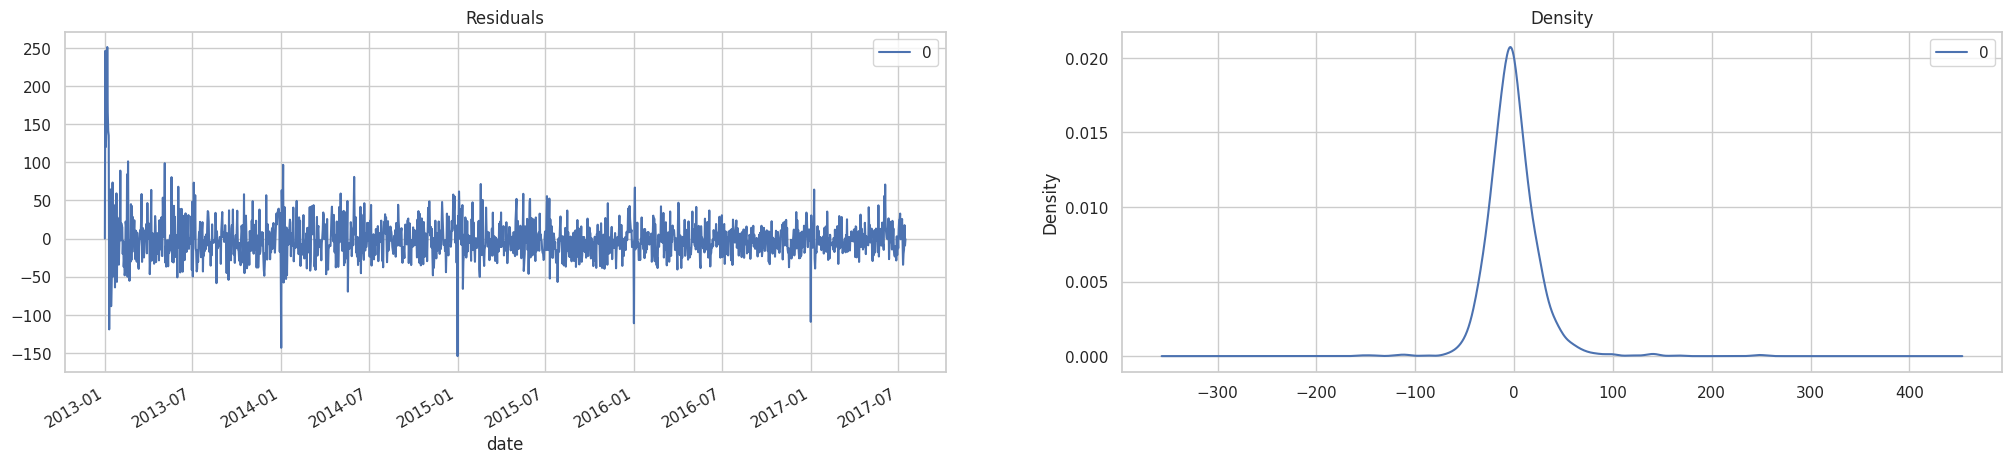

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelAutoSarima_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


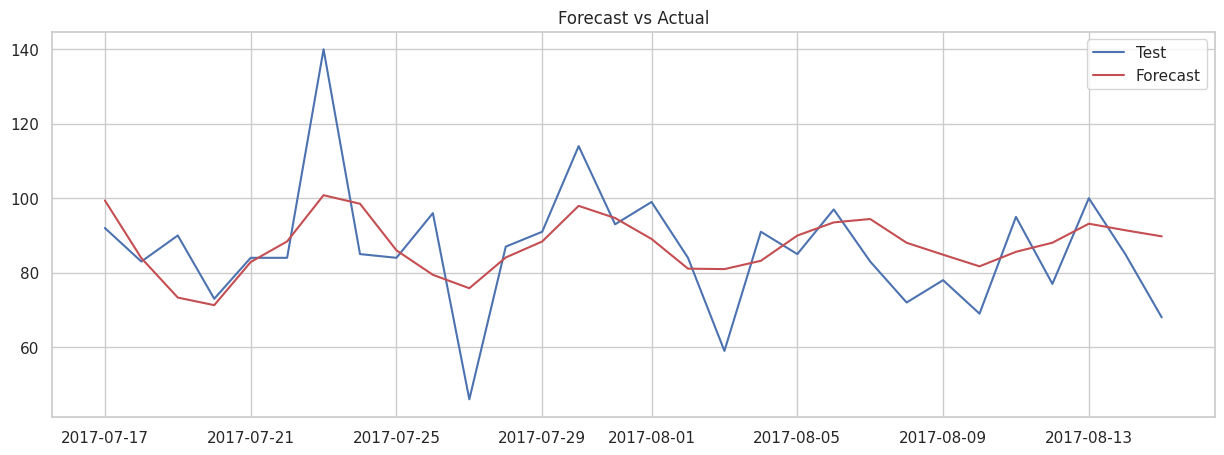

In [ ]:
forecast = modelSarima_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastAutoSarima = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastAutoSarima

test    forecast
date                         
2017-07-17   92.0   99.401162
2017-07-18   83.0   83.918137
2017-07-19   90.0   73.323641
2017-07-20   73.0   71.283781
2017-07-21   84.0   82.868274
2017-07-22   84.0   88.404869
2017-07-23  140.0  100.814761
2017-07-24   85.0   98.518834
2017-07-25   84.0   86.007185
2017-07-26   96.0   79.435249
2017-07-27   46.0   75.830413
2017-07-28   87.0   84.094619
2017-07-29   91.0   88.388858
2017-07-30  114.0   97.952253
2017-07-31   93.0   94.684307
2017-08-01   99.0   89.063536
2017-08-02   84.0   81.093744
2017-08-03   59.0   80.966884
2017-08-04   91.0   83.202604
2017-08-05   85.0   89.978614
2017-08-06   97.0   93.513535
2017-08-07   83.0   94.419646
2017-08-08   72.0   88.037471
2017-08-09   78.0   84.839417
2017-08-10   69.0   81.711841
2017-08-11   95.0   85.611923
2017-08-12   77.0   88.054346
2017-08-13  100.0   93.161772
2017-08-14   85.0   91.401482
2017-08-15   68.0   89.768660

##SARIMAX

In [ ]:
# Seasonal ARIMA X (SARIMAX)
modelSarimax = ARIMA(train['sales'], order=(7, 0, 0), seasonal_order=(7, 1, 1,8),exog=train['onpromotion'])
modelSarimax_fit = modelSarima.fit()
print(modelSarimax_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1654
Model:             ARIMA(7, 0, 0)x(0, 1, [1], 2)   Log Likelihood               -7518.752
Date:                           Fri, 15 Mar 2024   AIC                          15055.504
Time:                                   12:42:16   BIC                          15104.192
Sample:                                        0   HQIC                         15073.554
                                          - 1654                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1569      0.019      8.121      0.000       0.119       0.195
ar.L2         -0.0553      0.020     -2.791

###Plot Residual

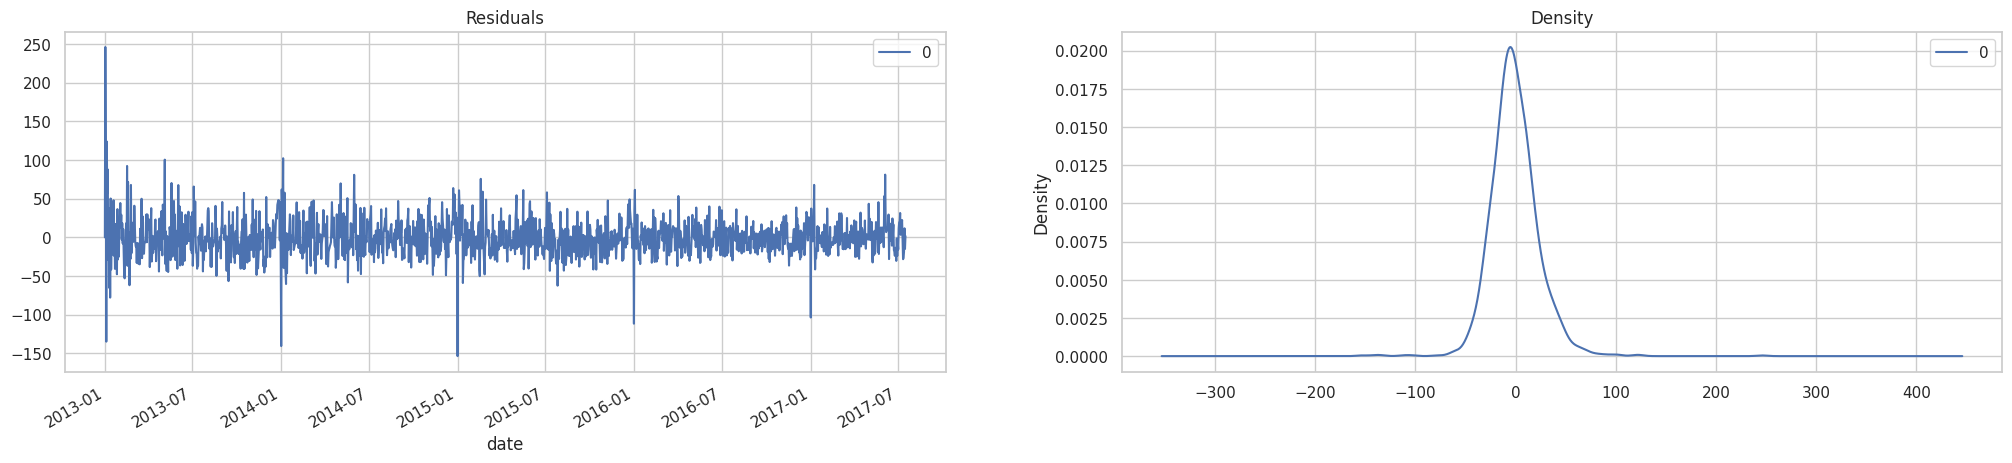

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(modelSarimax_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

###Predicting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


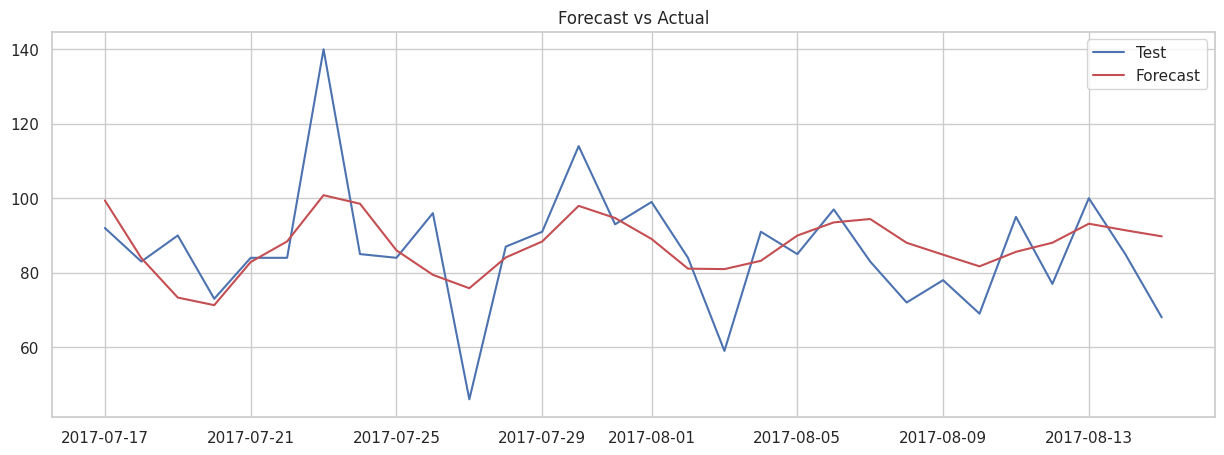

In [ ]:
# Predict data
# Forecast
forecast = modelSarimax_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
forecast.index = test.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(test['sales'], label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [ ]:
forecastSarimax = pd.DataFrame({'test': test['sales'], 'forecast': forecast})
forecastSarimax

test    forecast
date                         
2017-07-17   92.0   99.401162
2017-07-18   83.0   83.918137
2017-07-19   90.0   73.323641
2017-07-20   73.0   71.283781
2017-07-21   84.0   82.868274
2017-07-22   84.0   88.404869
2017-07-23  140.0  100.814761
2017-07-24   85.0   98.518834
2017-07-25   84.0   86.007185
2017-07-26   96.0   79.435249
2017-07-27   46.0   75.830413
2017-07-28   87.0   84.094619
2017-07-29   91.0   88.388858
2017-07-30  114.0   97.952253
2017-07-31   93.0   94.684307
2017-08-01   99.0   89.063536
2017-08-02   84.0   81.093744
2017-08-03   59.0   80.966884
2017-08-04   91.0   83.202604
2017-08-05   85.0   89.978614
2017-08-06   97.0   93.513535
2017-08-07   83.0   94.419646
2017-08-08   72.0   88.037471
2017-08-09   78.0   84.839417
2017-08-10   69.0   81.711841
2017-08-11   95.0   85.611923
2017-08-12   77.0   88.054346
2017-08-13  100.0   93.161772
2017-08-14   85.0   91.401482
2017-08-15   68.0   89.768660

##LSTM

In [ ]:
eggs

sales  onpromotion  dcoilwtico  year  month  week  day  weekday  \
date                                                                          
2013-01-01    0.0            0       93.14  2013      1     1    1        1   
2013-01-02  246.0            0       93.14  2013      1     1    2        2   
2013-01-03  120.0            0       92.97  2013      1     1    3        3   
2013-01-04  141.0            0       93.12  2013      1     1    4        4   
2013-01-05  143.0            0       93.12  2013      1     1    5        5   
...           ...          ...         ...   ...    ...   ...  ...      ...   
2017-08-11   95.0           24       48.81  2017      8    32   11        4   
2017-08-12   77.0            0       48.81  2017      8    32   12        5   
2017-08-13  100.0            0       48.81  2017      8    32   13        6   
2017-08-14   85.0            0       47.59  2017      8    33   14        0   
2017-08-15   68.0            0       47.57  2017      8    33   15        1   

            sales_mean_7  sales_mean_30  
date                                     
2013-01-01           NaN            NaN  
2013-01-02           NaN            NaN  
2013-01-03           NaN            NaN  
2013-01-04           NaN            NaN  
2013-01-05           NaN            NaN  
...                  ...            ...  
2017-08-11     82.714286      86.333333  
2017-08-12     81.571429      87.000000  
2017-08-13     82.000000      87.366667  
2017-08-14     82.285714      87.533333  
2017-08-15     81.714286      86.133333  

[1684 rows x 10 columns]

In [ ]:
# Import min-max scaling function
from sklearn.preprocessing import MinMaxScaler
# Import keras lstm model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Split data
# Scalling

dcoilwtico_scaler = MinMaxScaler()
sales_scaler = MinMaxScaler()
x = eggs[['onpromotion', 'dcoilwtico']].copy()
y = eggs['sales'].copy()

x['dcoilwtico'] = dcoilwtico_scaler.fit_transform(x['dcoilwtico'].values.reshape(-1, 1))
y = sales_scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
def load_data(X, seq_len, test_size=30):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_data = data[:-test_size]  # Exclude last 'test_size' data points for test set

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]

    x_test = data[-test_size:, :-1]
    y_test = data[-test_size:, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

window = 7
x['sales'] = y
X_train, y_train, X_test, y_test = load_data(x, window,test_size=30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1646, 7, 3) (1646,) (30, 7, 3) (30,)


In [ ]:
#LSTM architecture
modelLSTM = Sequential()
# First LSTM layer with Dropout regularisation
modelLSTM.add(LSTM(units=100, input_shape=(window,3)))
modelLSTM.add(Dropout(0.2))

modelLSTM.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


# Compiling the RNN
modelLSTM.compile(optimizer='adam',loss='mse')
# Fitting to the training set
start = time.time()
history1=modelLSTM.fit(X_train,y_train,epochs=200,batch_size=16, validation_split=0.05, verbose=1)
print ('compilation time : ', time.time() - start)

Epoch 1/200
98/98 [==============================] - 10s 41ms/step - loss: 0.0273 - val_loss: 0.0088
Epoch 2/200
98/98 [==============================] - 2s 15ms/step - loss: 0.0112 - val_loss: 0.0066
Epoch 3/200
98/98 [==============================] - 2s 16ms/step - loss: 0.0104 - val_loss: 0.0050
Epoch 4/200
98/98 [==============================] - 2s 16ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 5/200
98/98 [==============================] - 1s 11ms/step - loss: 0.0100 - val_loss: 0.0061
Epoch 6/200
98/98 [==============================] - 1s 9ms/step - loss: 0.0094 - val_loss: 0.0072
Epoch 7/200
98/98 [==============================] - 1s 9ms/step - loss: 0.0095 - val_loss: 0.0047
Epoch 8/200
98/98 [==============================] - 1s 9ms/step - loss: 0.0092 - val_loss: 0.0045
Epoch 9/200
98/98 [==============================] - 1s 10ms/step - loss: 0.0087 - val_loss: 0.0046
Epoch 10/200
98/98 [==============================] - 1s 13ms/step - loss: 0.0088 - val_loss: 0.0046
E

In [ ]:
trainPredict = modelLSTM.predict(X_train)
testPredict = modelLSTM.predict(X_test)

trainPredict = sales_scaler.inverse_transform(trainPredict)
trainY = sales_scaler.inverse_transform([y_train])
testPredict = sales_scaler.inverse_transform(testPredict)
testY = sales_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(30, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(30, 1)
print(plot_actual.shape)
print(plot_predicted.shape)

1/1 [==============================] - 0s 30ms/step
(30, 1)
(30, 1)


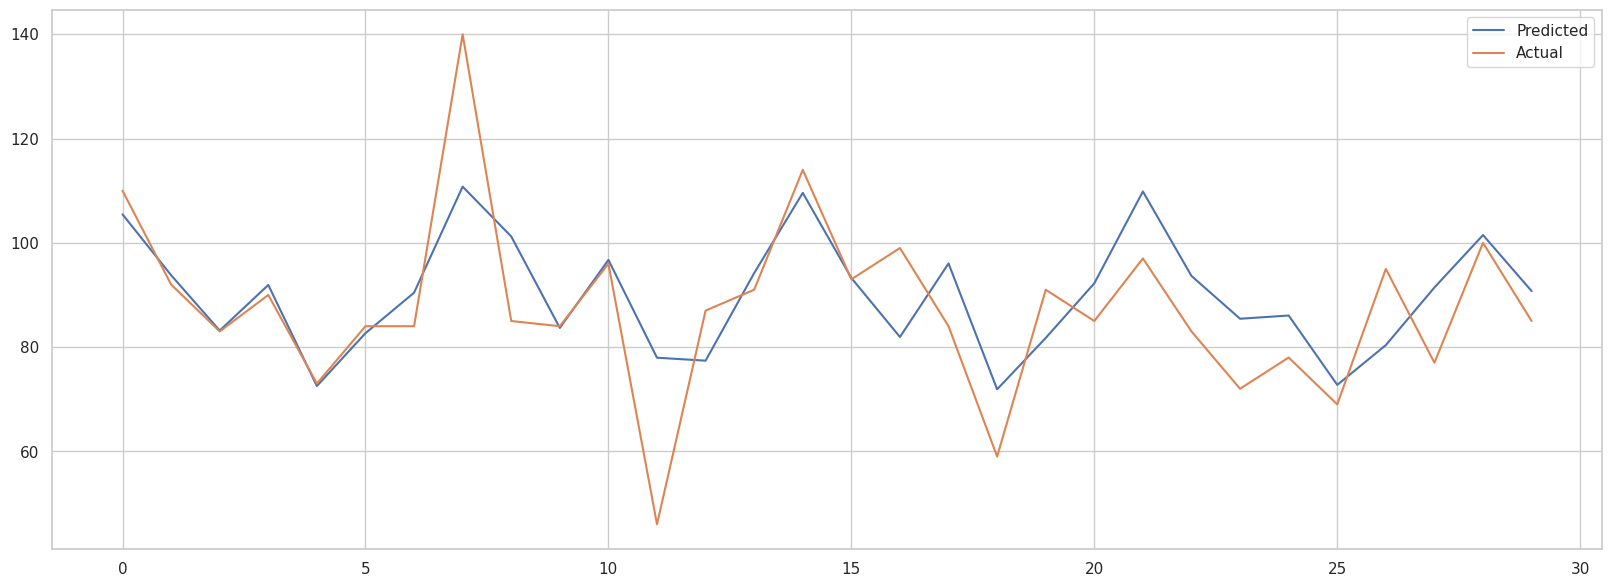

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend(loc='best')
plt.show()

In [ ]:
plot_predicted = plot_predicted.reshape(30,)

forecastLSTM = pd.DataFrame({'test': test['sales'], 'forecast': plot_predicted}, index=test.index)
forecastLSTM

test    forecast
date                         
2017-07-17   92.0  105.460434
2017-07-18   83.0   93.787338
2017-07-19   90.0   83.172668
2017-07-20   73.0   91.915451
2017-07-21   84.0   72.528305
2017-07-22   84.0   82.664642
2017-07-23  140.0   90.427834
2017-07-24   85.0  110.778191
2017-07-25   84.0  101.219688
2017-07-26   96.0   83.674835
2017-07-27   46.0   96.720680
2017-07-28   87.0   77.958969
2017-07-29   91.0   77.392029
2017-07-30  114.0   94.200371
2017-07-31   93.0  109.580147
2017-08-01   99.0   93.256439
2017-08-02   84.0   81.937836
2017-08-03   59.0   96.046005
2017-08-04   91.0   71.898735
2017-08-05   85.0   81.748878
2017-08-06   97.0   92.236290
2017-08-07   83.0  109.847755
2017-08-08   72.0   93.641411
2017-08-09   78.0   85.432991
2017-08-10   69.0   86.055588
2017-08-11   95.0   72.747559
2017-08-12   77.0   80.375313
2017-08-13  100.0   91.439072
2017-08-14   85.0  101.490929
2017-08-15   68.0   90.740135

#4_Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
model = [forecastARIMA, forecastAutoArima, forecastSarima, forecastAutoSarima,forecastSarimax, forecastLSTM]
model_name = ['Arima', 'AutoArima', 'Sarima', 'AutoSarima','Sarimax', 'LSTM']
metrics = []

for i in range(len(model)):
    mae = mean_absolute_error(model[i]['test'], model[i]['forecast'])
    mse = mean_squared_error(model[i]['test'], model[i]['forecast'])
    r2 = r2_score(model[i]['test'], model[i]['forecast'])
    metrics.append([mae, mse, r2])

metrics = pd.DataFrame(metrics, columns=['MAE', 'MSE', 'R2'], index=model_name)
metrics

MAE         MSE        R2
Arima       10.490904  190.429858  0.286554
AutoArima   11.771601  242.825861  0.090252
Sarima      10.337824  185.829453  0.303789
AutoSarima  10.337824  185.829453  0.303789
Sarimax     10.337824  185.829453  0.303789
LSTM        16.526920  420.803147 -0.576540